In [1]:
# Importing Libraries

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading Dataset

In [4]:
df_zomato = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv',encoding='ISO-8859-1')

In [5]:
df_country = pd.read_excel(r'C:\Users\apple\Downloads\Country-Code.xlsx')

In [7]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
df = pd.merge(df_zomato,df_country,on='Country Code',how='left')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
# Datasets has been merged successfully

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
df.shape

(9551, 22)

In [12]:
# EDA (Exploratory Data Analysis)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
# There are 9551 rows and 22 columns in the dataset and there are two target variables named 'Average cost for two' and 'Price Range'
#'Average Cost For Two' analyzed as a Regression Problem and 'Price Range' analyzed as a Classification Problem

In [15]:
# List of Object Columns
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')


In [16]:
# list of int64 Columns
numerical_columns = df.select_dtypes(include='int64').columns
print(numerical_columns)

Index(['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range',
       'Votes'],
      dtype='object')


In [17]:
# list of float64 variables
float_columns = df.select_dtypes(include='float64').columns
print(float_columns)

Index(['Longitude', 'Latitude', 'Aggregate rating'], dtype='object')


In [21]:
# Missing Values
missing_value = df.isnull().sum()

In [22]:
missing_value

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [25]:
# There are no missing values in the dataset except for the Cuisines column which has 9 missing values

In [26]:
# Feature Analysis

In [27]:
# UNIQUE VALUES

In [28]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [29]:
# 'RestaurantID' is unique for each restaurant and Hence it is of no use for our analysis. So we can drop it from the dataset safely 

In [30]:
# The Address column has 8918 unique values out of 9551 rows.Which represents High Cardinality in the dataset.So we can drop this feature 

In [31]:
# The column 'Switch to order menu' has only one value 'No' which is of no use for our analysis. So we can drop this feature

In [33]:
# 'Average Cost for two' has 140 unique values which is of no use for our analysis.This indicates that regression problem since values are continous and numerical

In [34]:
# 'Price range' has 4 unique values which is of no use for our analysis.This indicates that classification problem since values are categorical

In [35]:
# Column such as 'Country code' and 'Aggregate rating' while numerical seems to contain categorical in nature 

In [36]:
# Dropping Unnecessary Columns

In [37]:
df.drop(['Restaurant ID','Address','Switch to order menu'],axis=1,inplace=True)

In [38]:
df.shape

(9551, 19)

In [41]:
# 'Average cost for two' has unique values
print(df['Average Cost for two'].unique())
print(df['Average Cost for two'].value_counts())

[  1100   1200   4000   1500   1000   2000   6000    800    900    700
    850    600   3000   1800     55     30     45     60     50     80
     90    200    150    100    230    240    350    140    170    120
    250     40     70    300     85     75    400     65     25     10
      0     20     35      7    270    500    430    315    220     95
    190    260    180    330    280    160    285    130    110   2500
   3600    550   1400    450    950    650   1300   2400   1600   2200
    750   1700   1250   1900   2700   3500   5000   2300   1750   3200
   2100   1850   4500   3300   1350   1650   1950   1050    290   1450
   2800   3650   4800   1550    720   6500   7000   1150   2900   2600
   4700   3700   3800   4100   4300   2650   5100   5500   4400   4200
   8000   2350 150000  70000 250000 200000 165000 800000 500000 300000
 450000 120000 100000 350000    105     15    445    294    360    535
    125    320    570   1540    515    955    390    410   3210    545]
Avera

In [42]:
# 'Price range' has unique values
print(df['Price range'].unique())
print(df['Price range'].value_counts())

[3 4 2 1]
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [47]:
# Separating Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include='object').columns
numer_categorical_columns = ['Country Code', 'Aggregate rating']
numerical_columns = [col for col in df.select_dtypes(include=np.number).columns.tolist() if col not in numer_categorical_columns]

# Removing target columns since they will be analyzed separately
numerical_columns.remove('Price range')
numerical_columns.remove('Average Cost for two')

In [48]:
print(f"Categorical Columns: \n{categorical_columns}\n")
print(f"Numerical Columns: \n{numerical_columns}\n")
print(f" Numerical columns that represents a Category: \n{numer_categorical_columns}\n")

Categorical Columns: 
Index(['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Rating color', 'Rating text', 'Country'],
      dtype='object')

Numerical Columns: 
['Longitude', 'Latitude', 'Votes']

 Numerical columns that represents a Category: 
['Country Code', 'Aggregate rating']



In [49]:
stats = df.describe()
stats

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [50]:
df.describe(exclude = [np.number])

,Restaurant Name,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text,Country
count,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,1208,1265,1825,12,2,2,2,6,6,15
top,Cafe Coffee Day,New Delhi,Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,Orange,Average,India
freq,83,5473,122,122,936,8652,8393,7100,9517,3737,3737,8652


In [51]:
# The summary of the dataset looks perfect as there are no invalid values present

In [53]:
# Duplicates
df.duplicated().sum()

0

In [54]:
# There are no duplicate data present in our datasets

In [55]:
# Data Visualization

In [56]:
# Univariate Analysis

In [71]:
# Categorical Columns

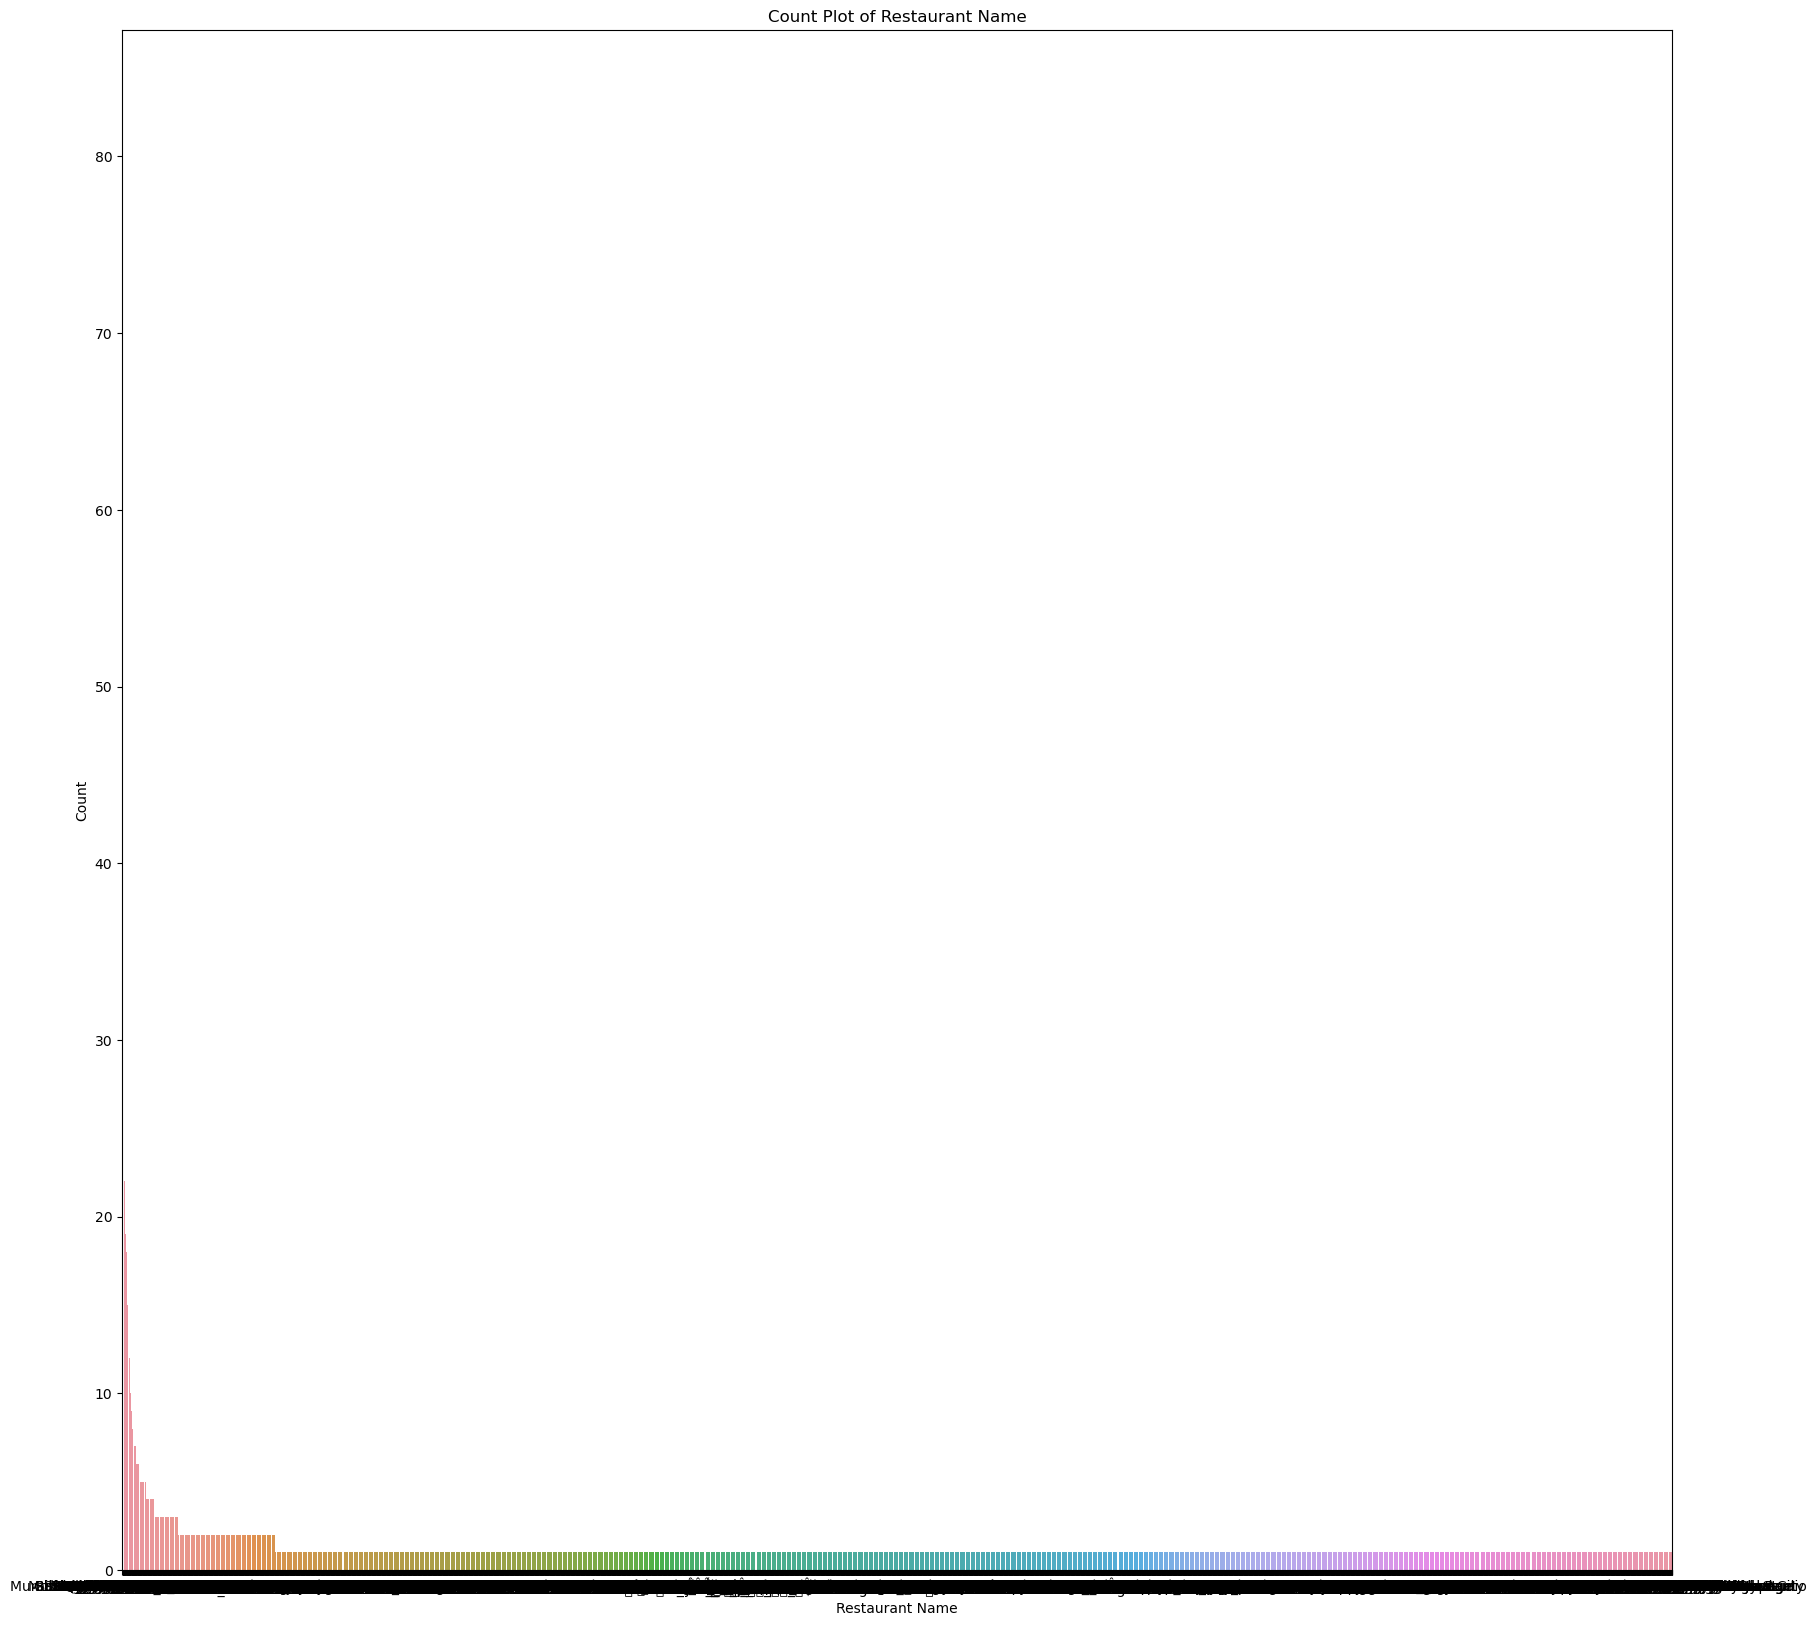

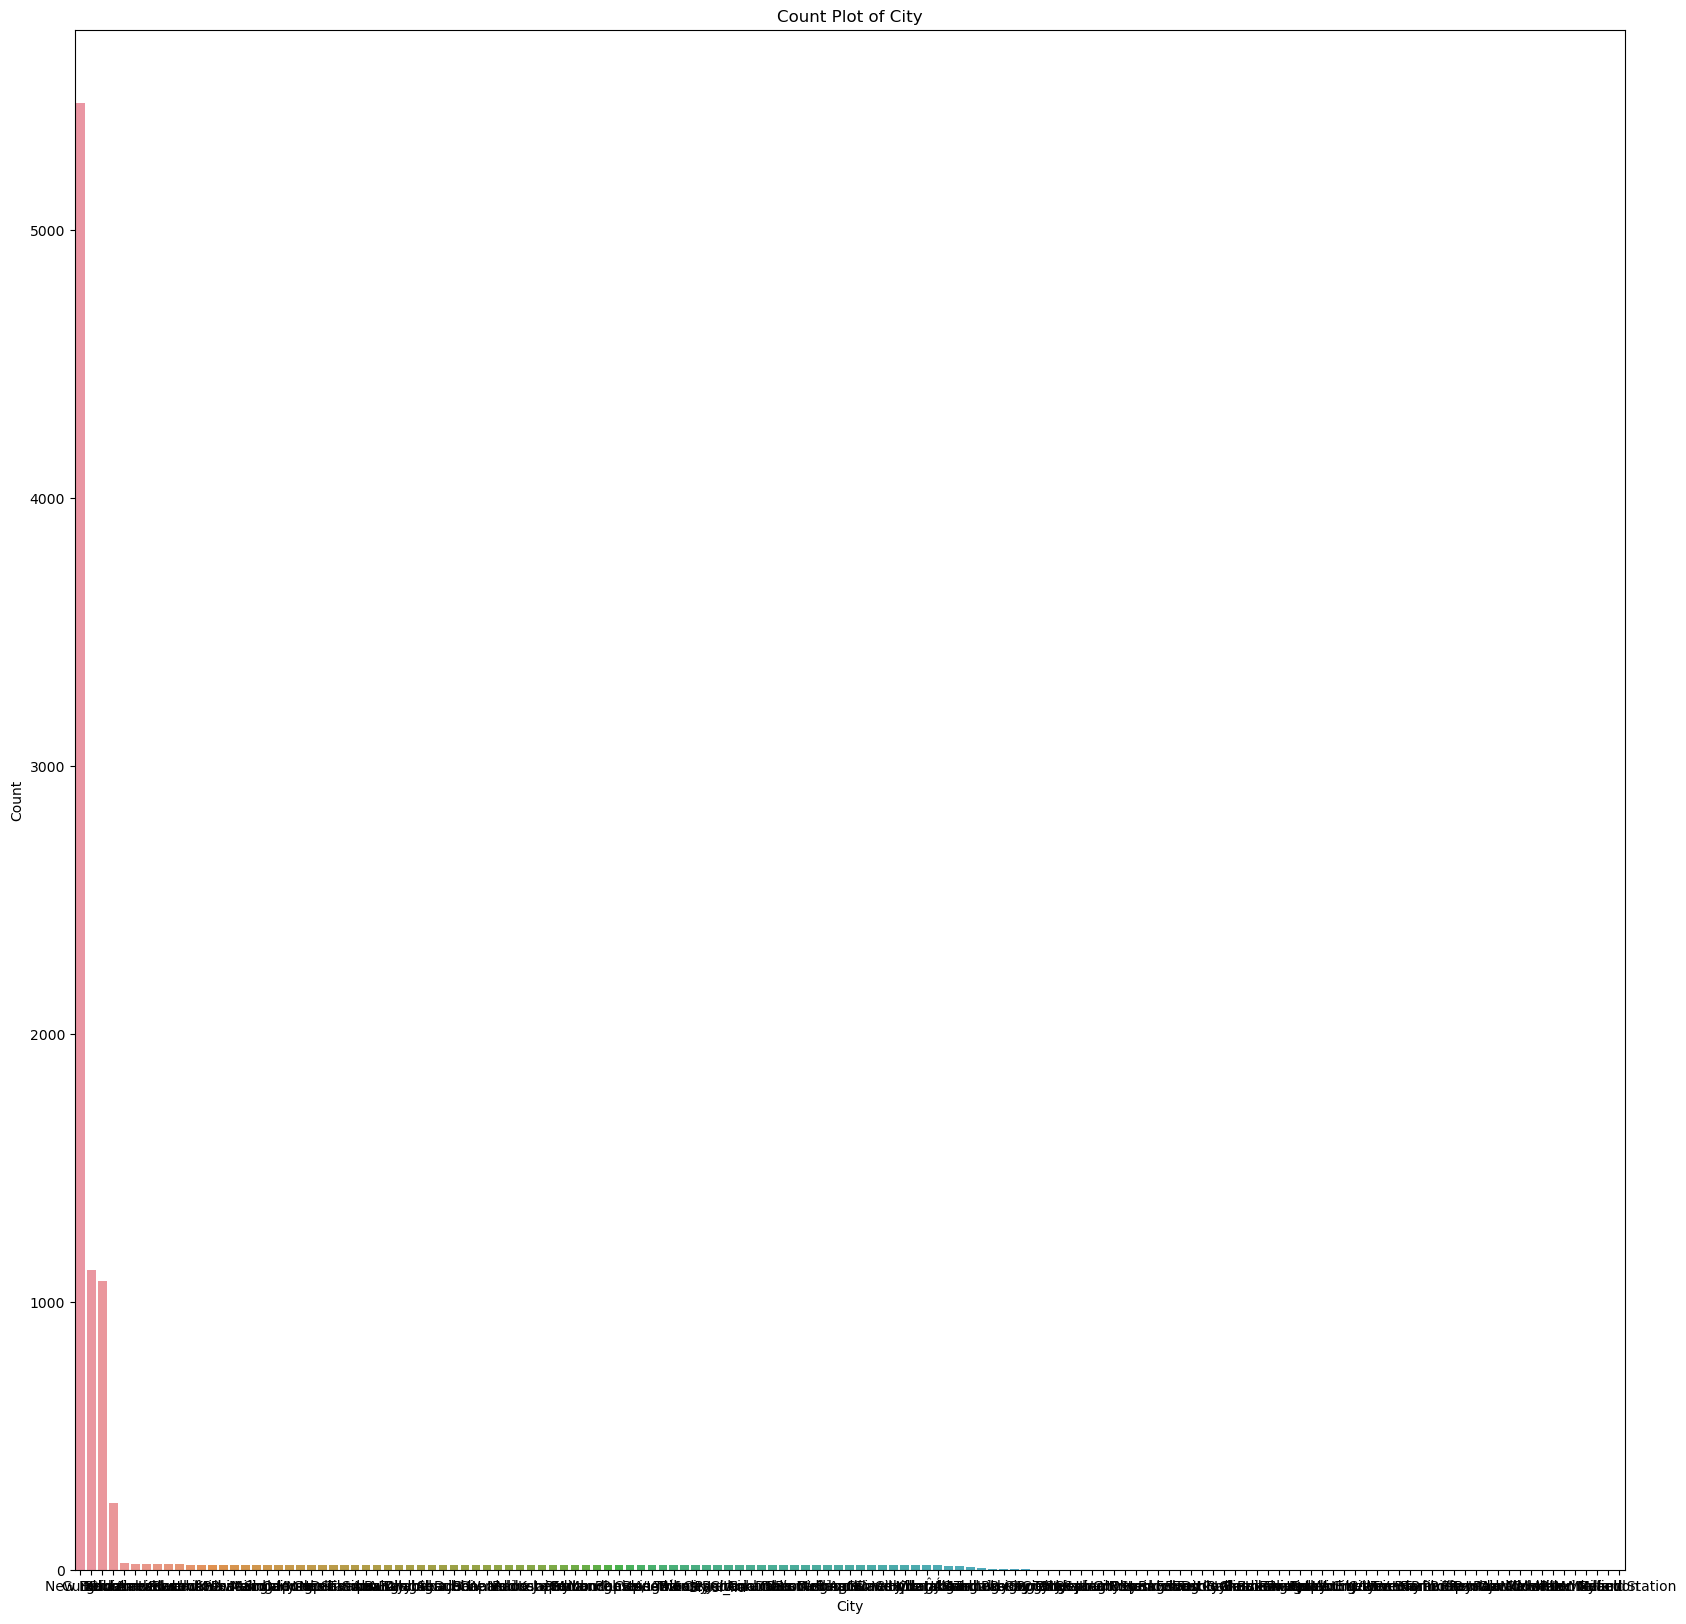

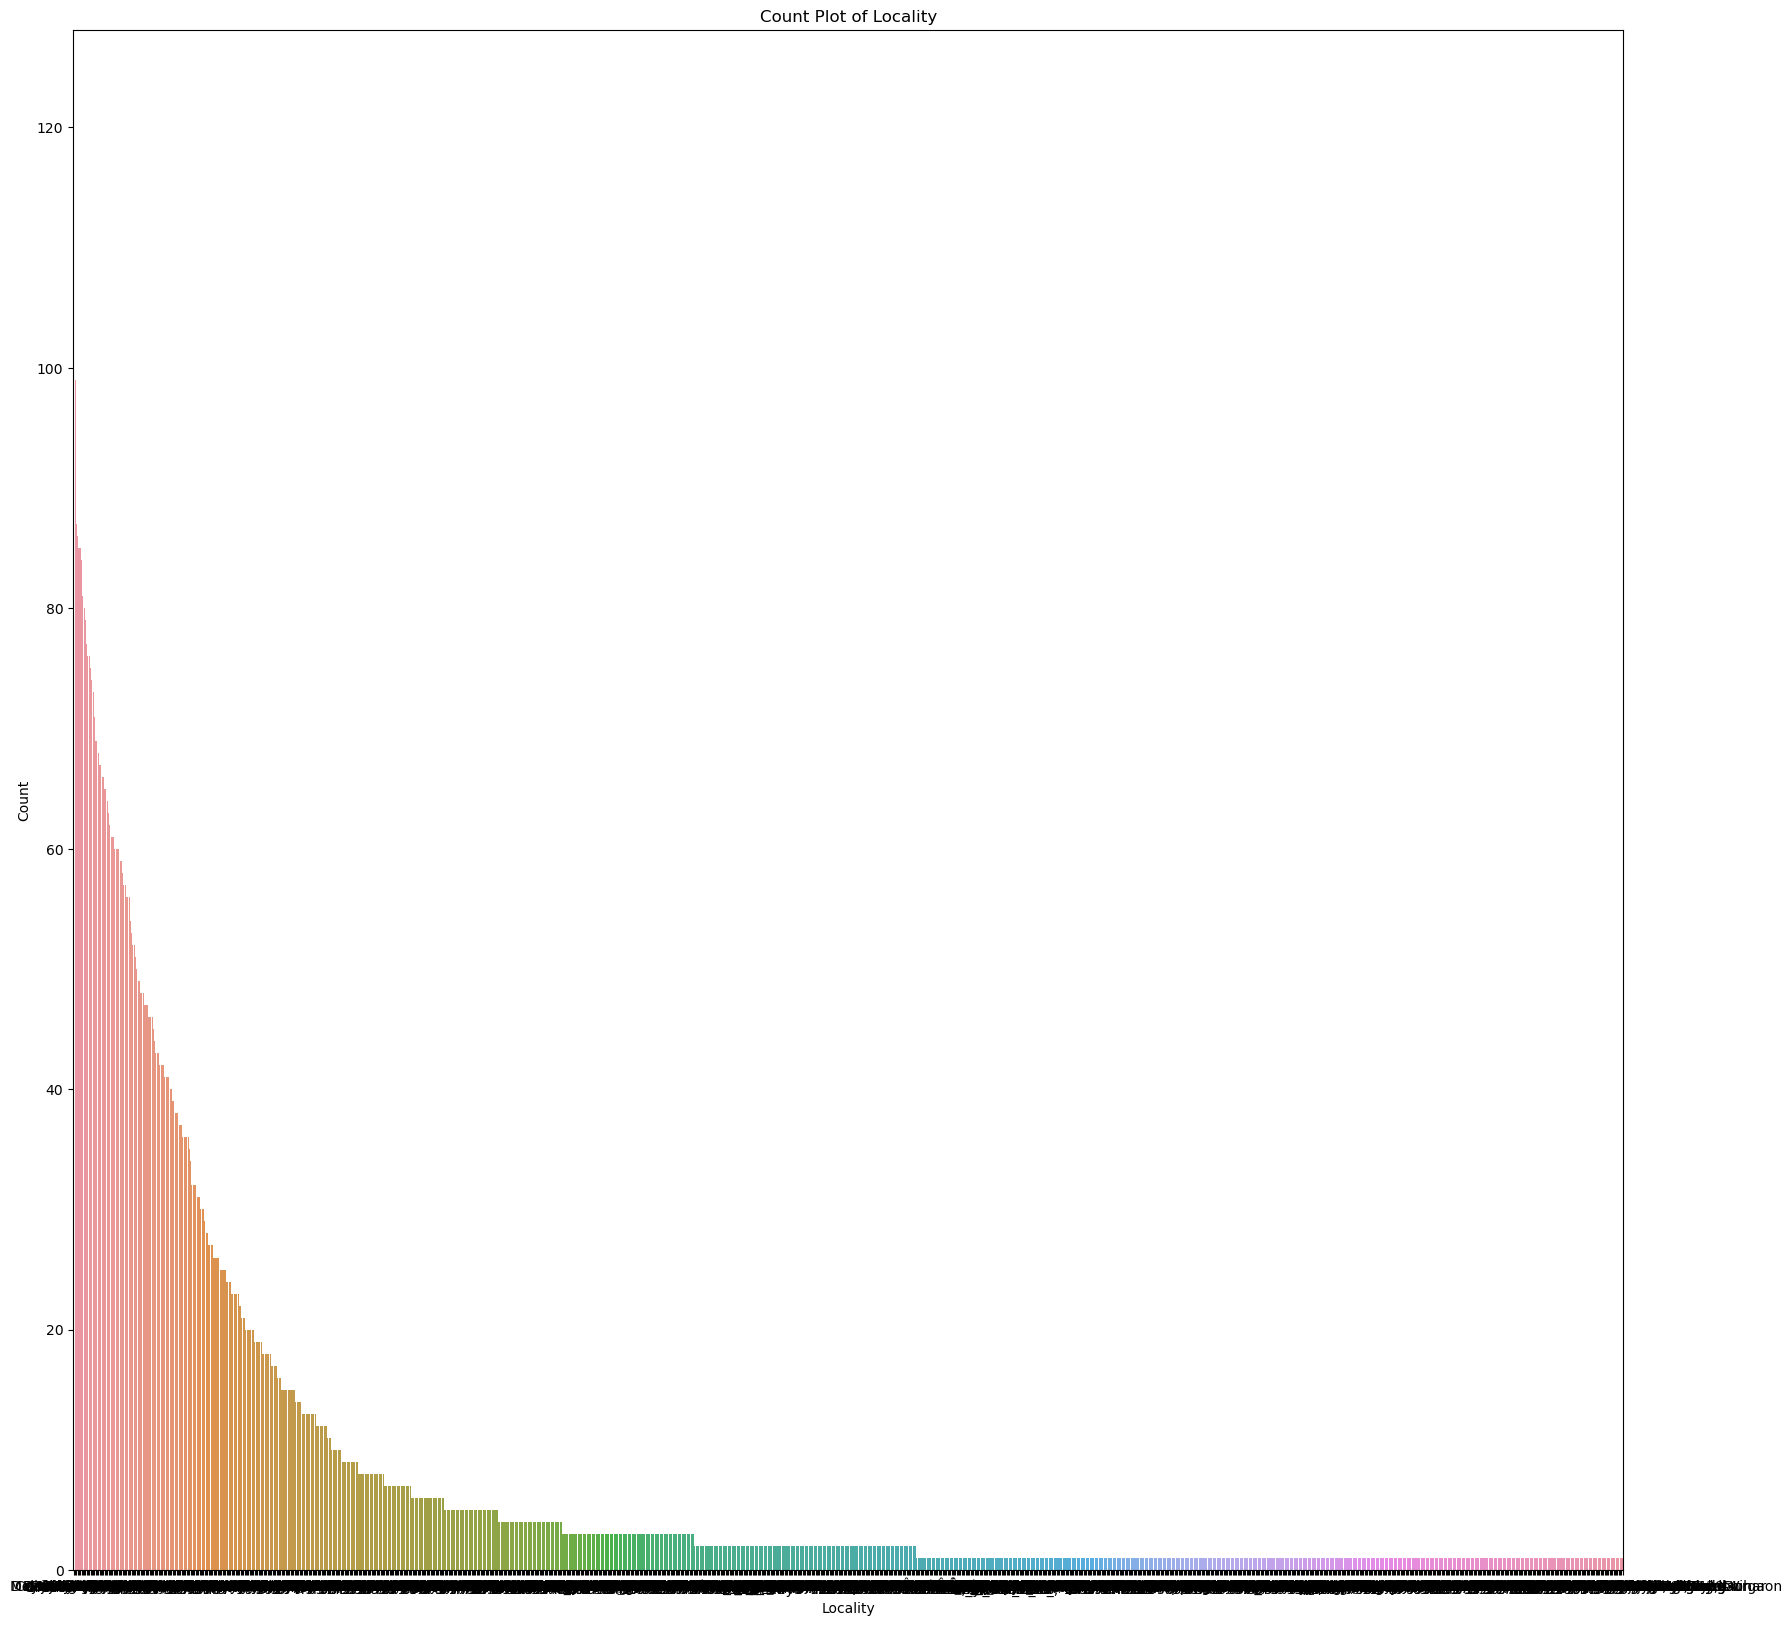

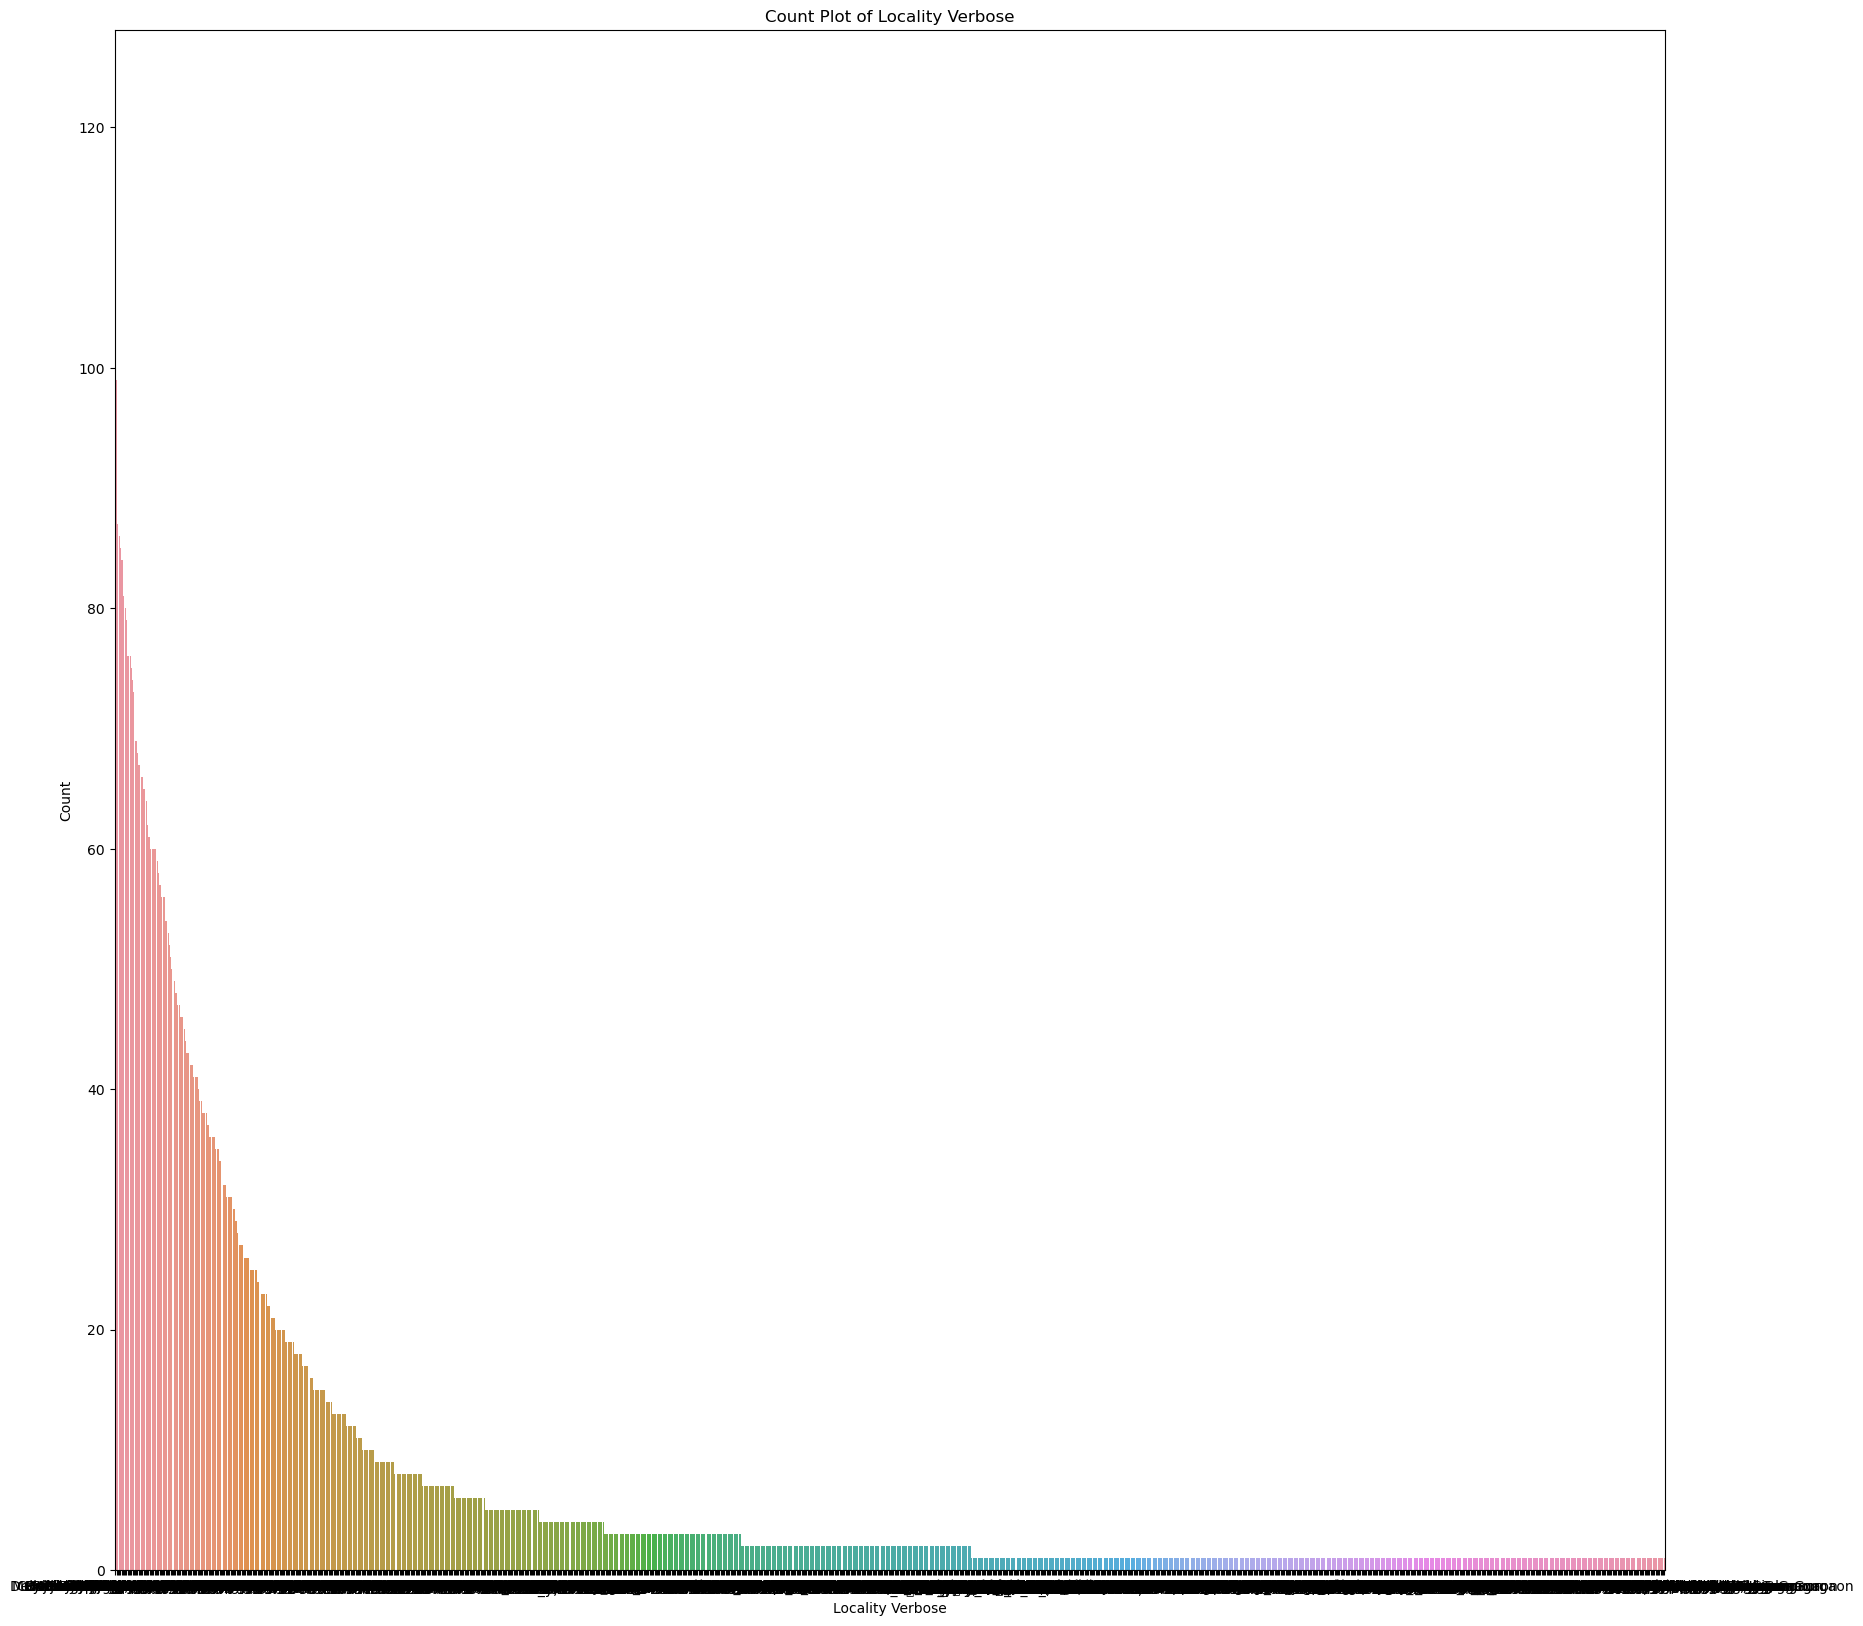

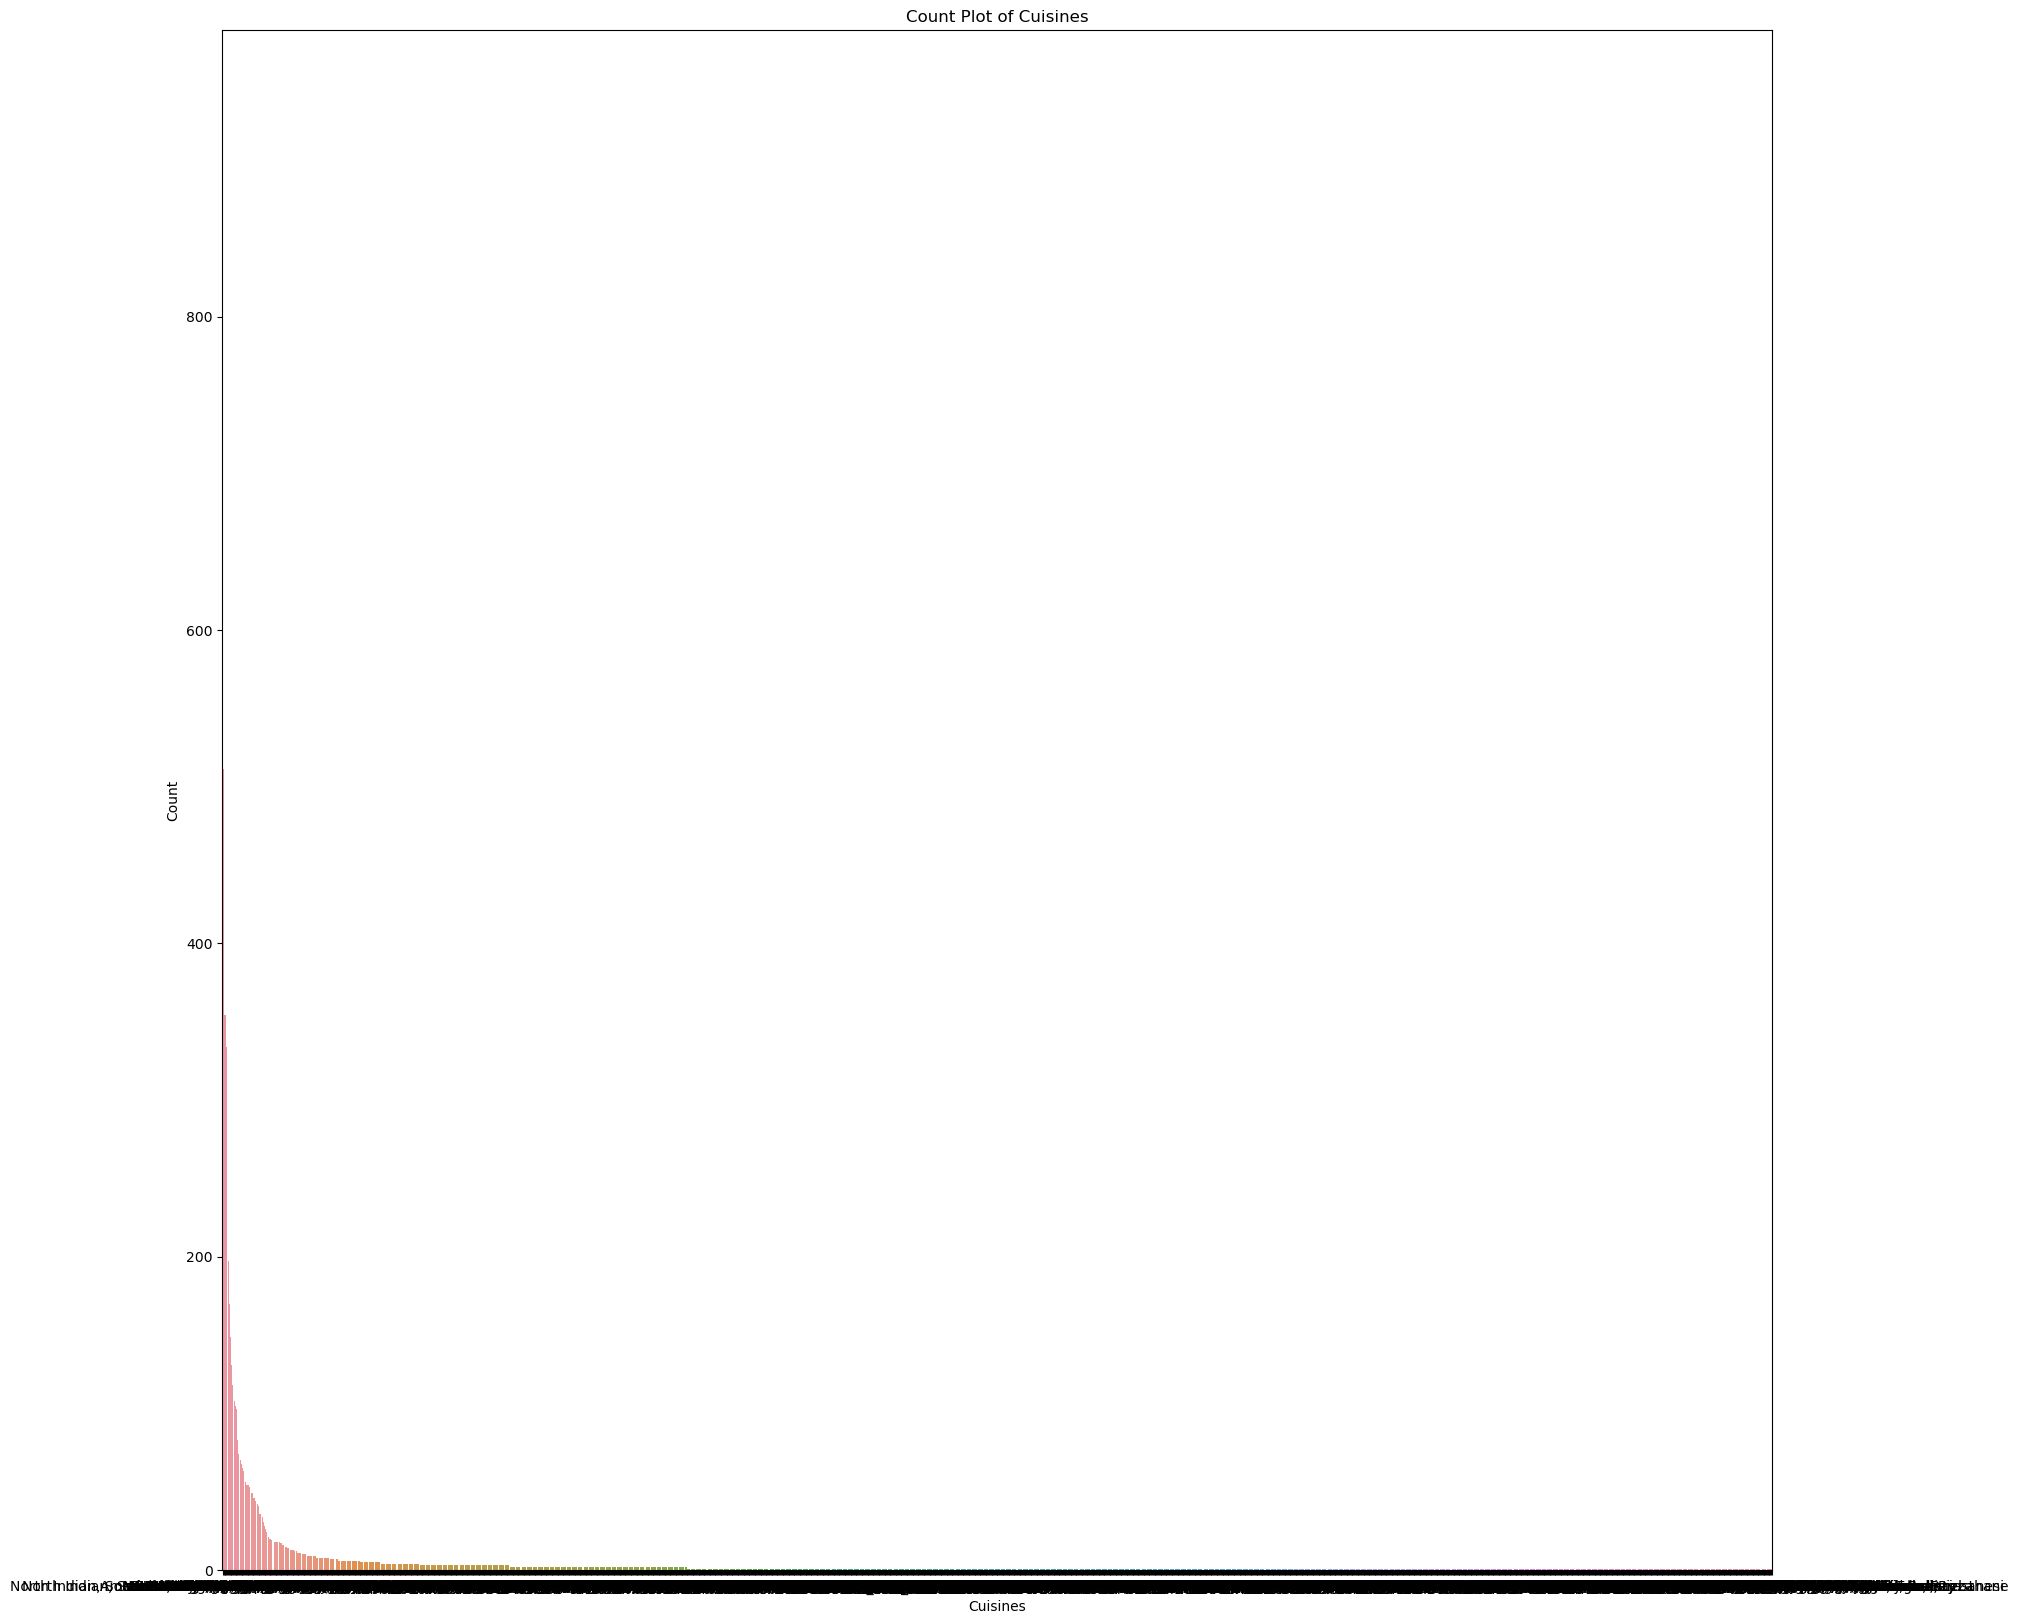

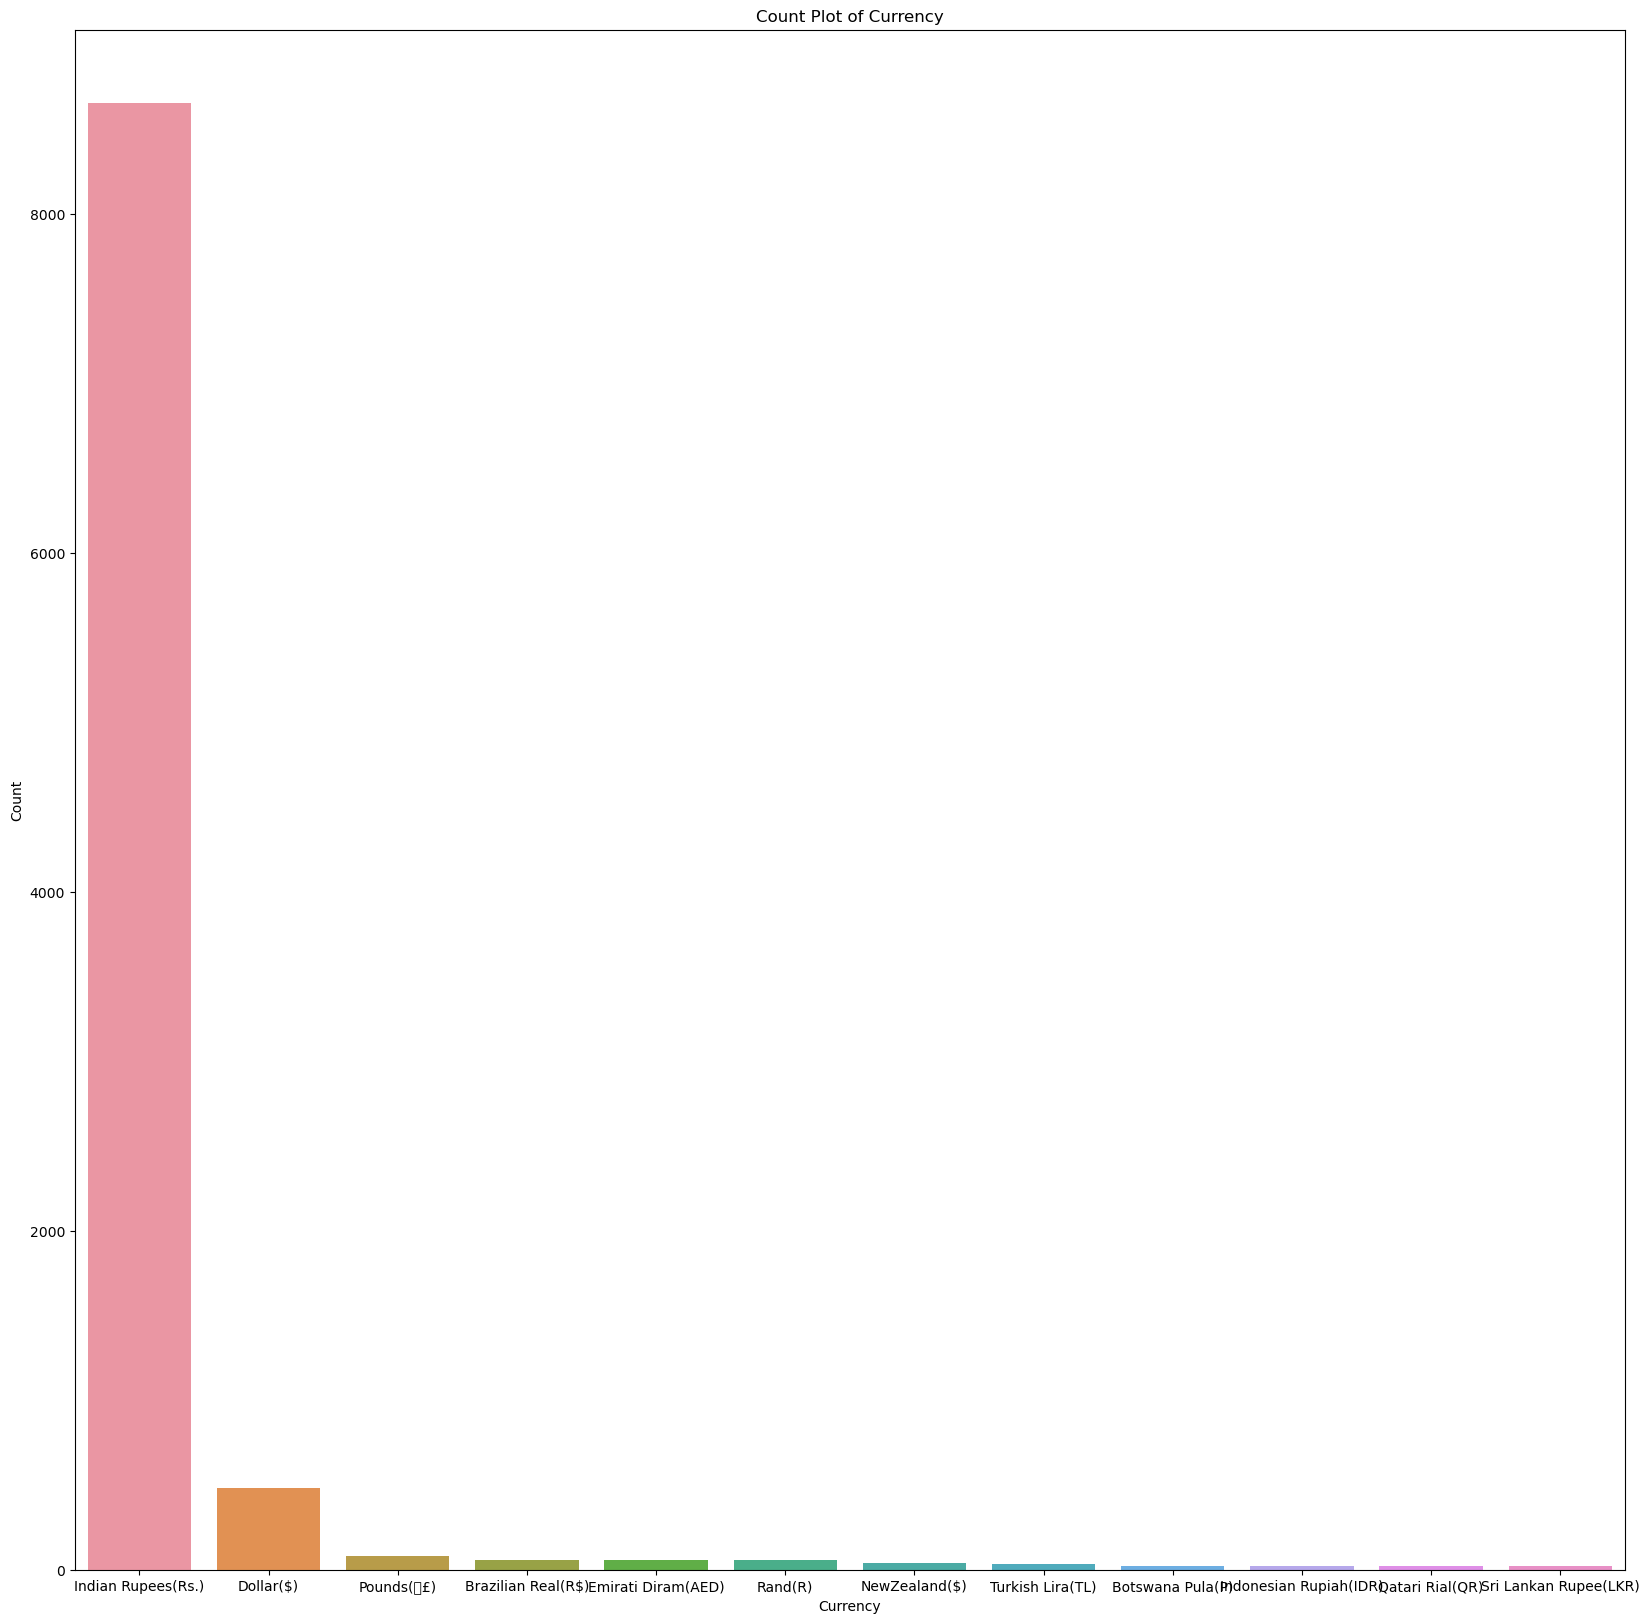

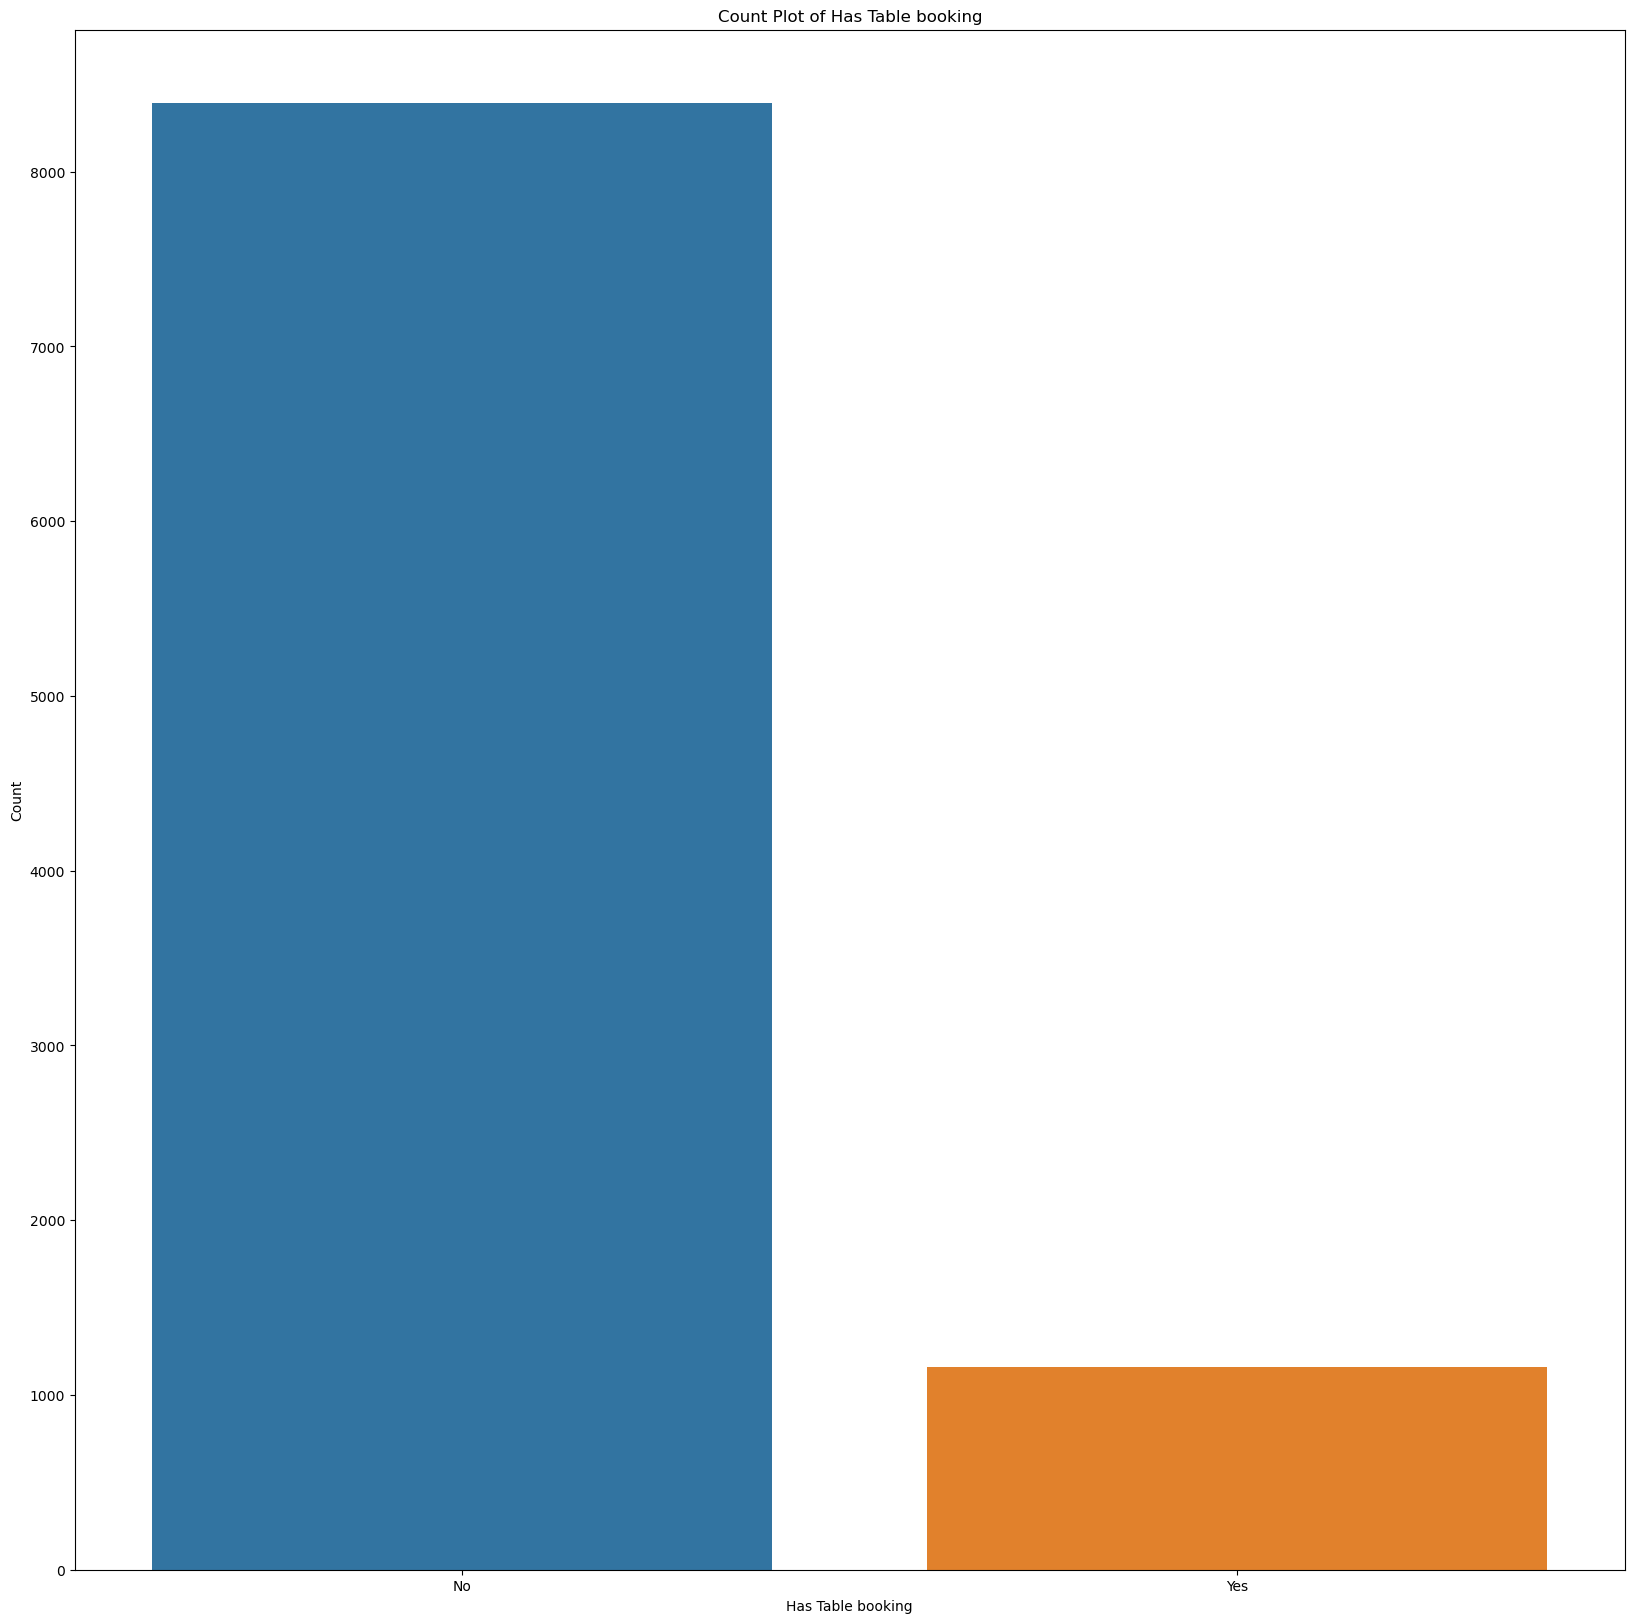

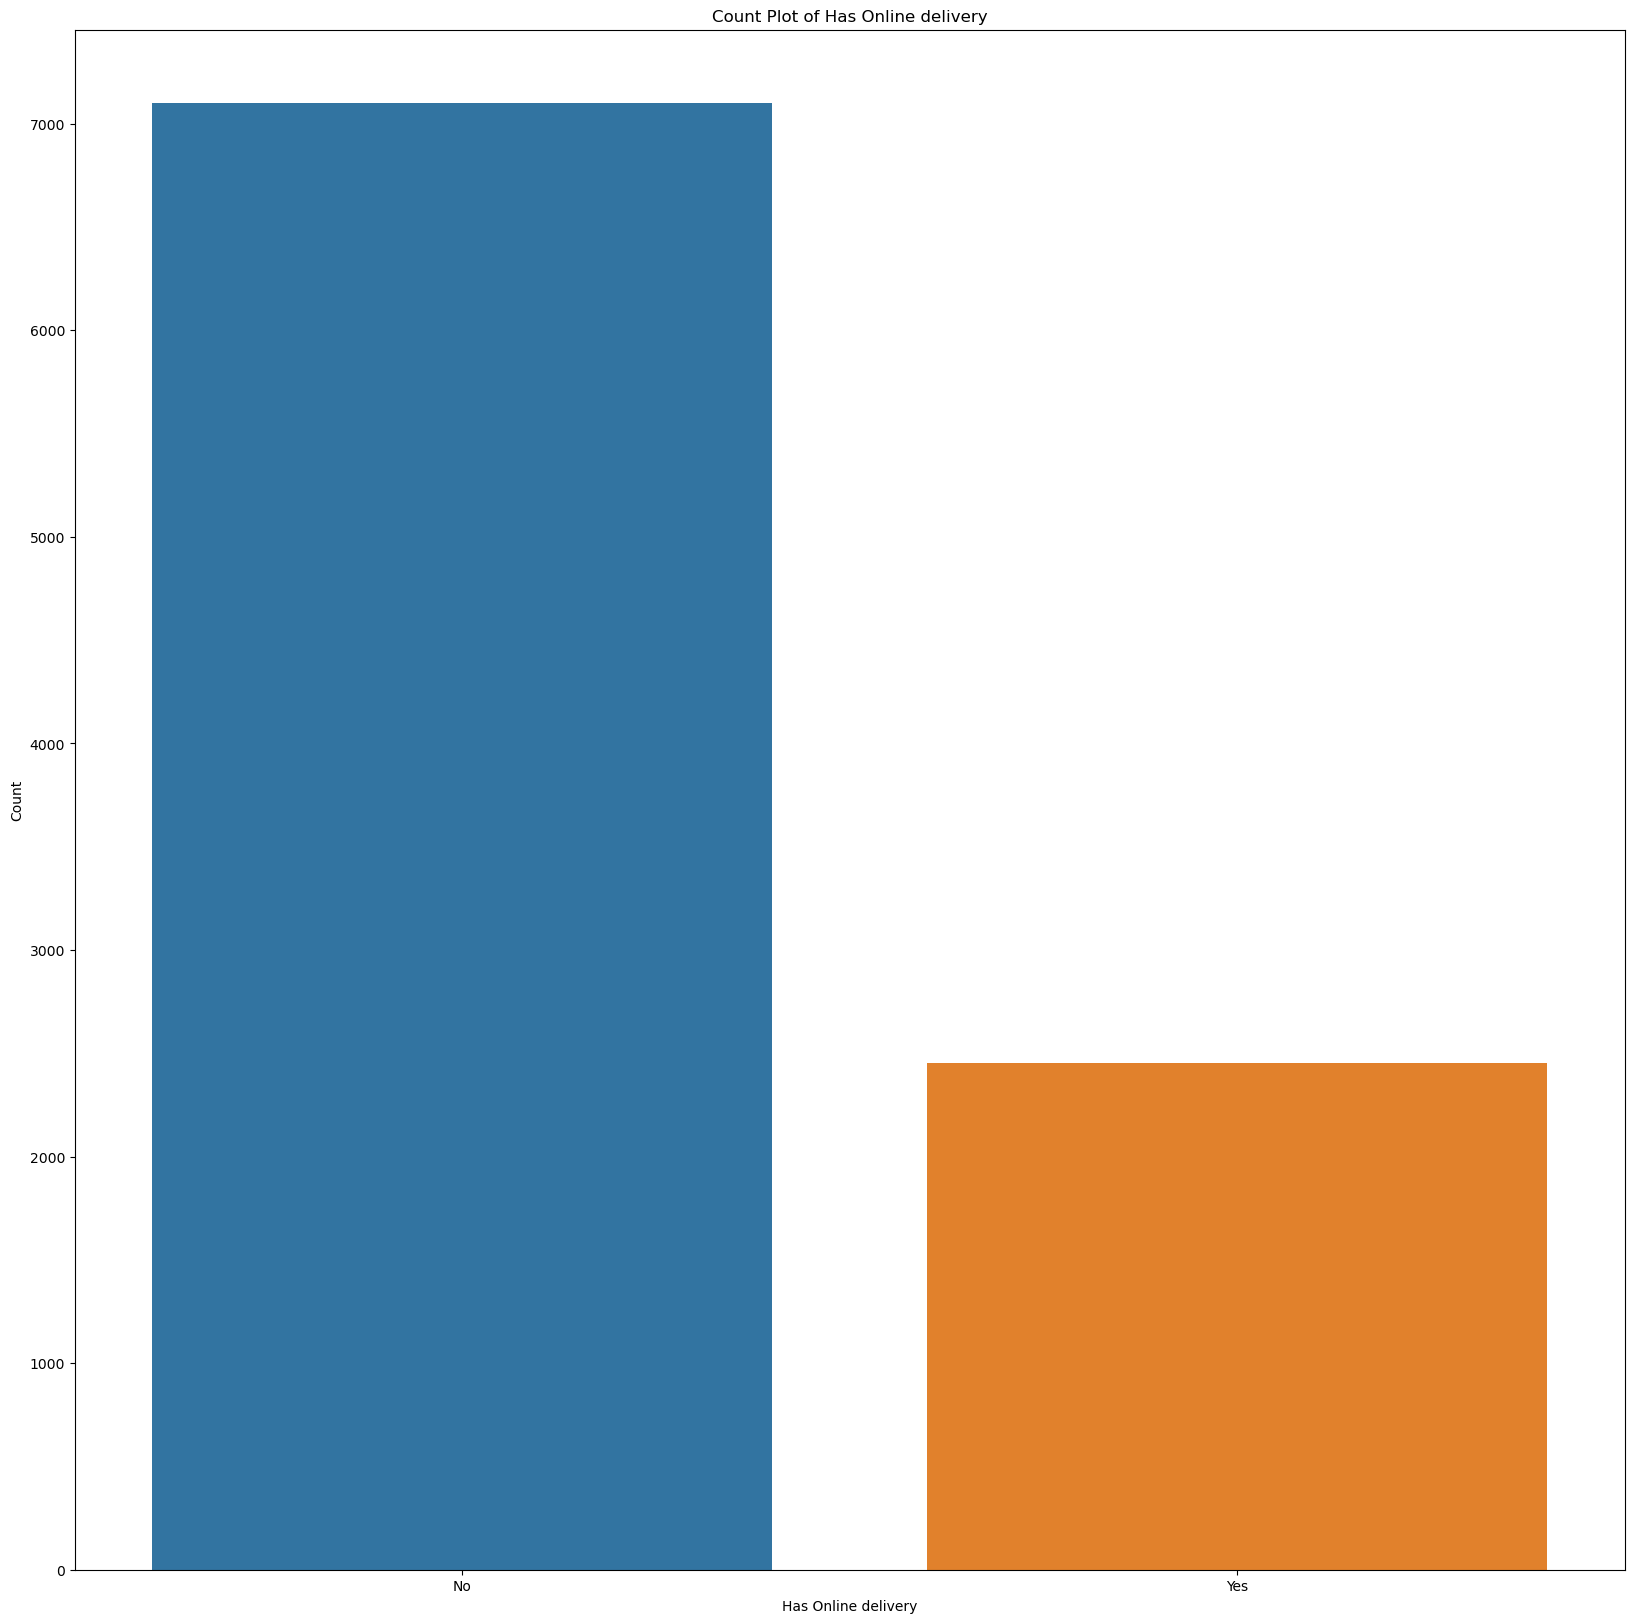

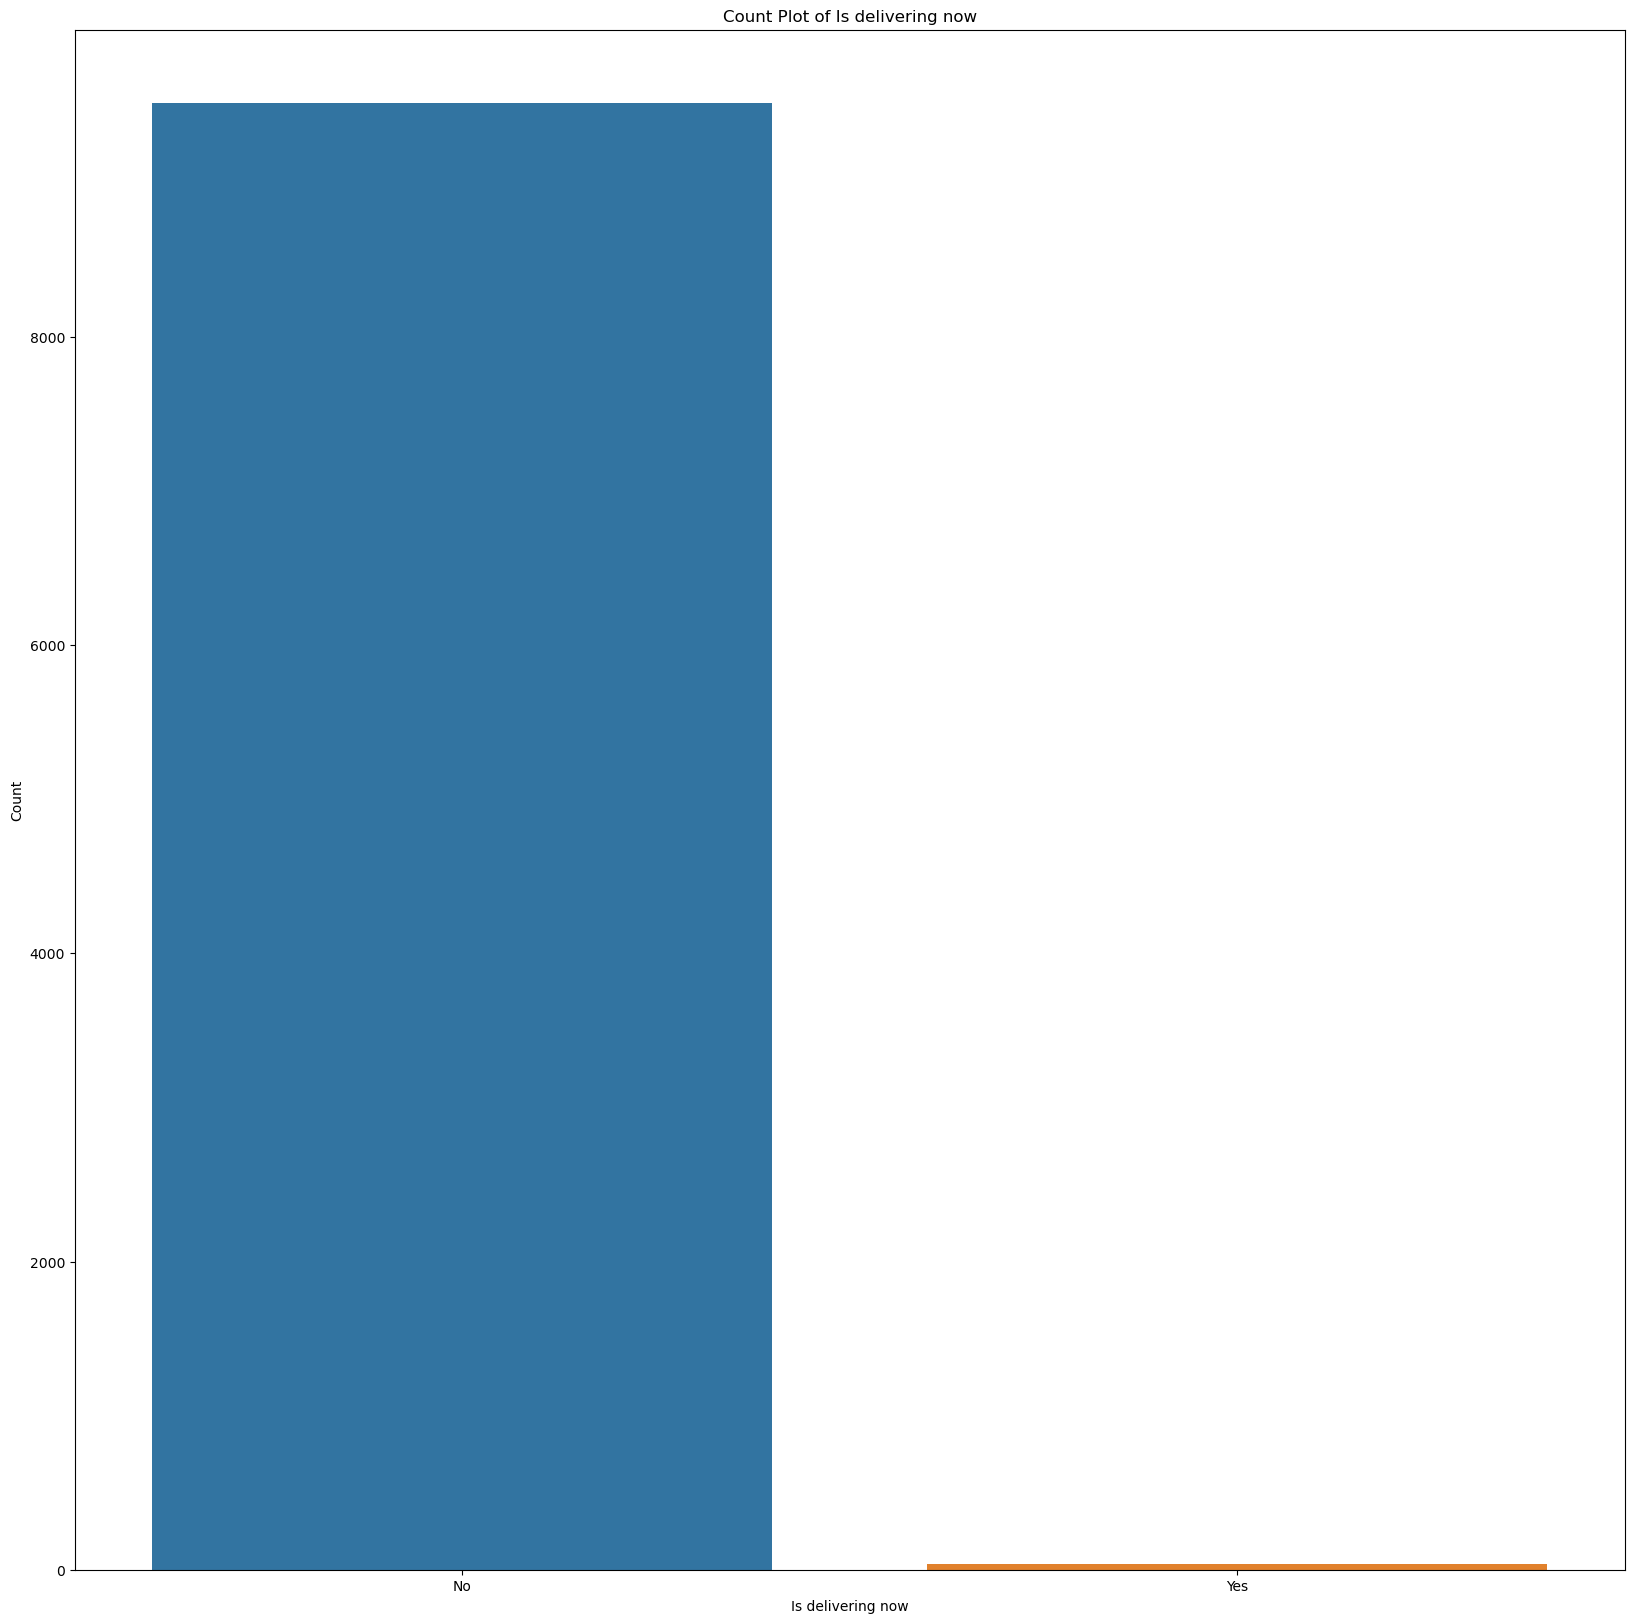

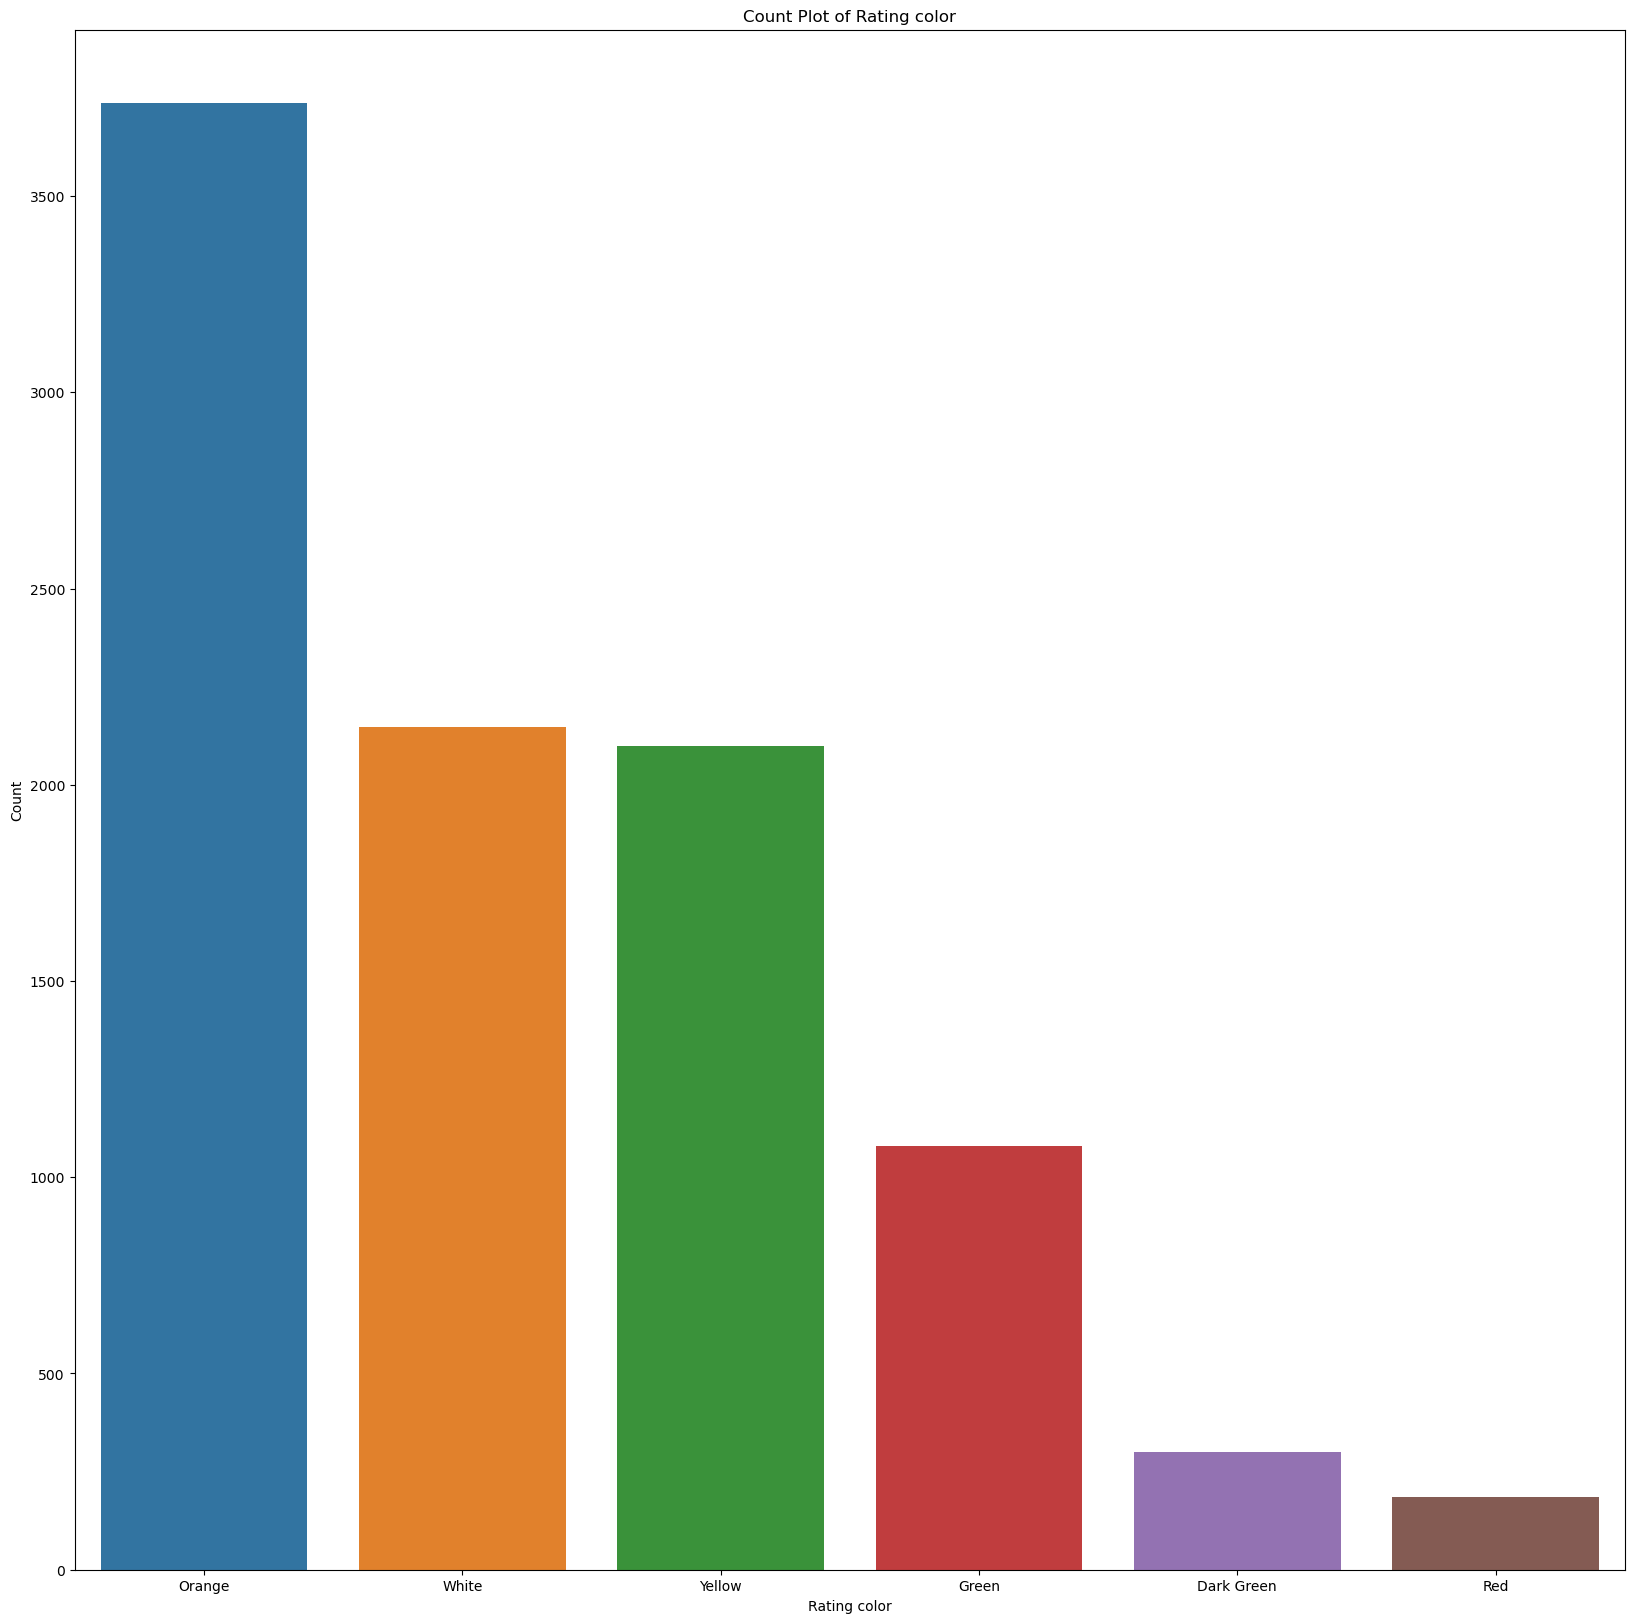

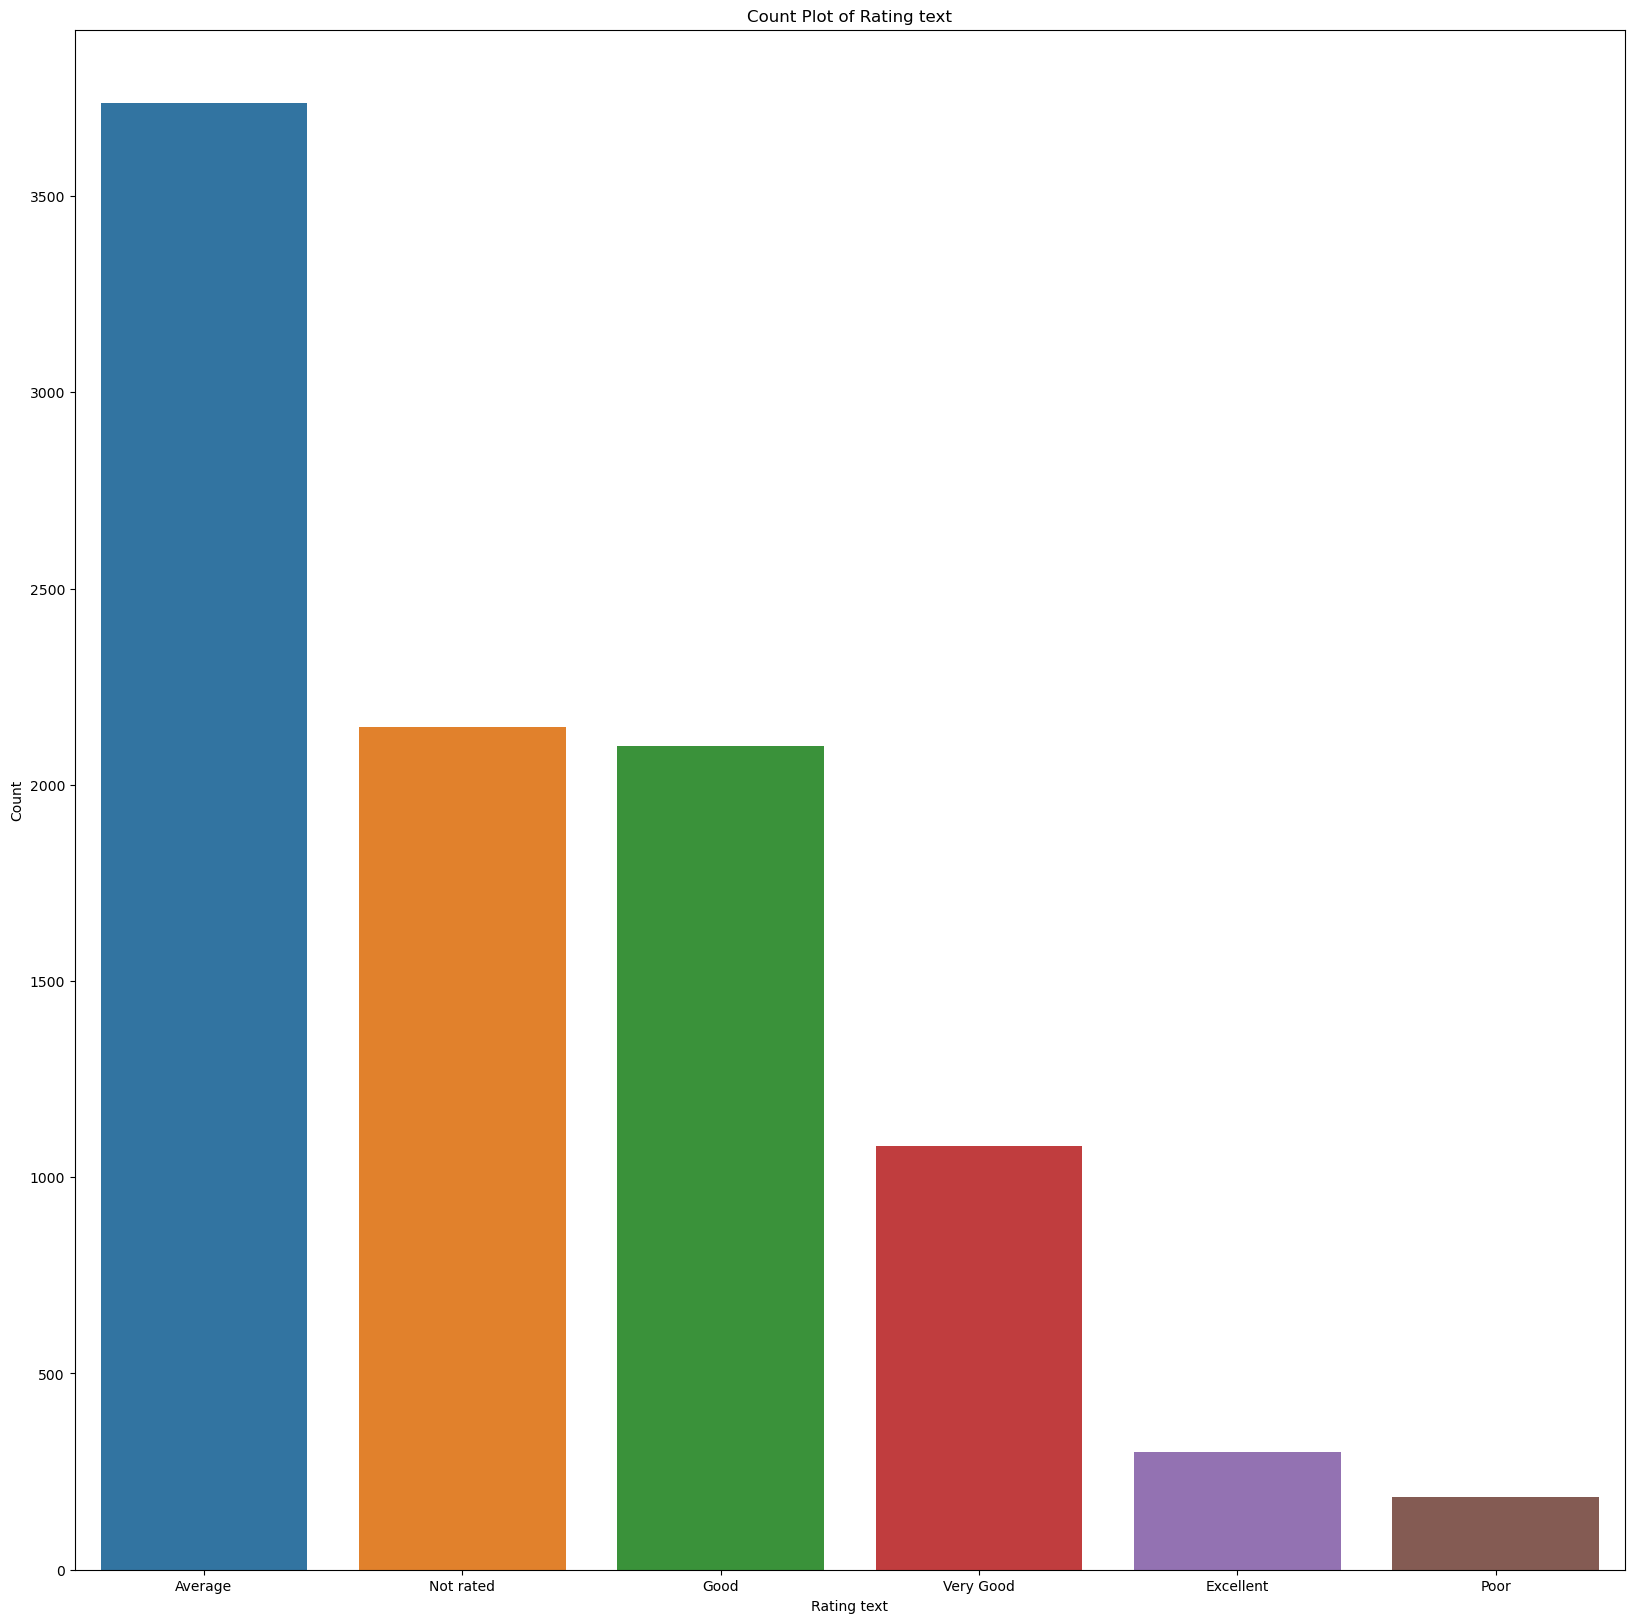

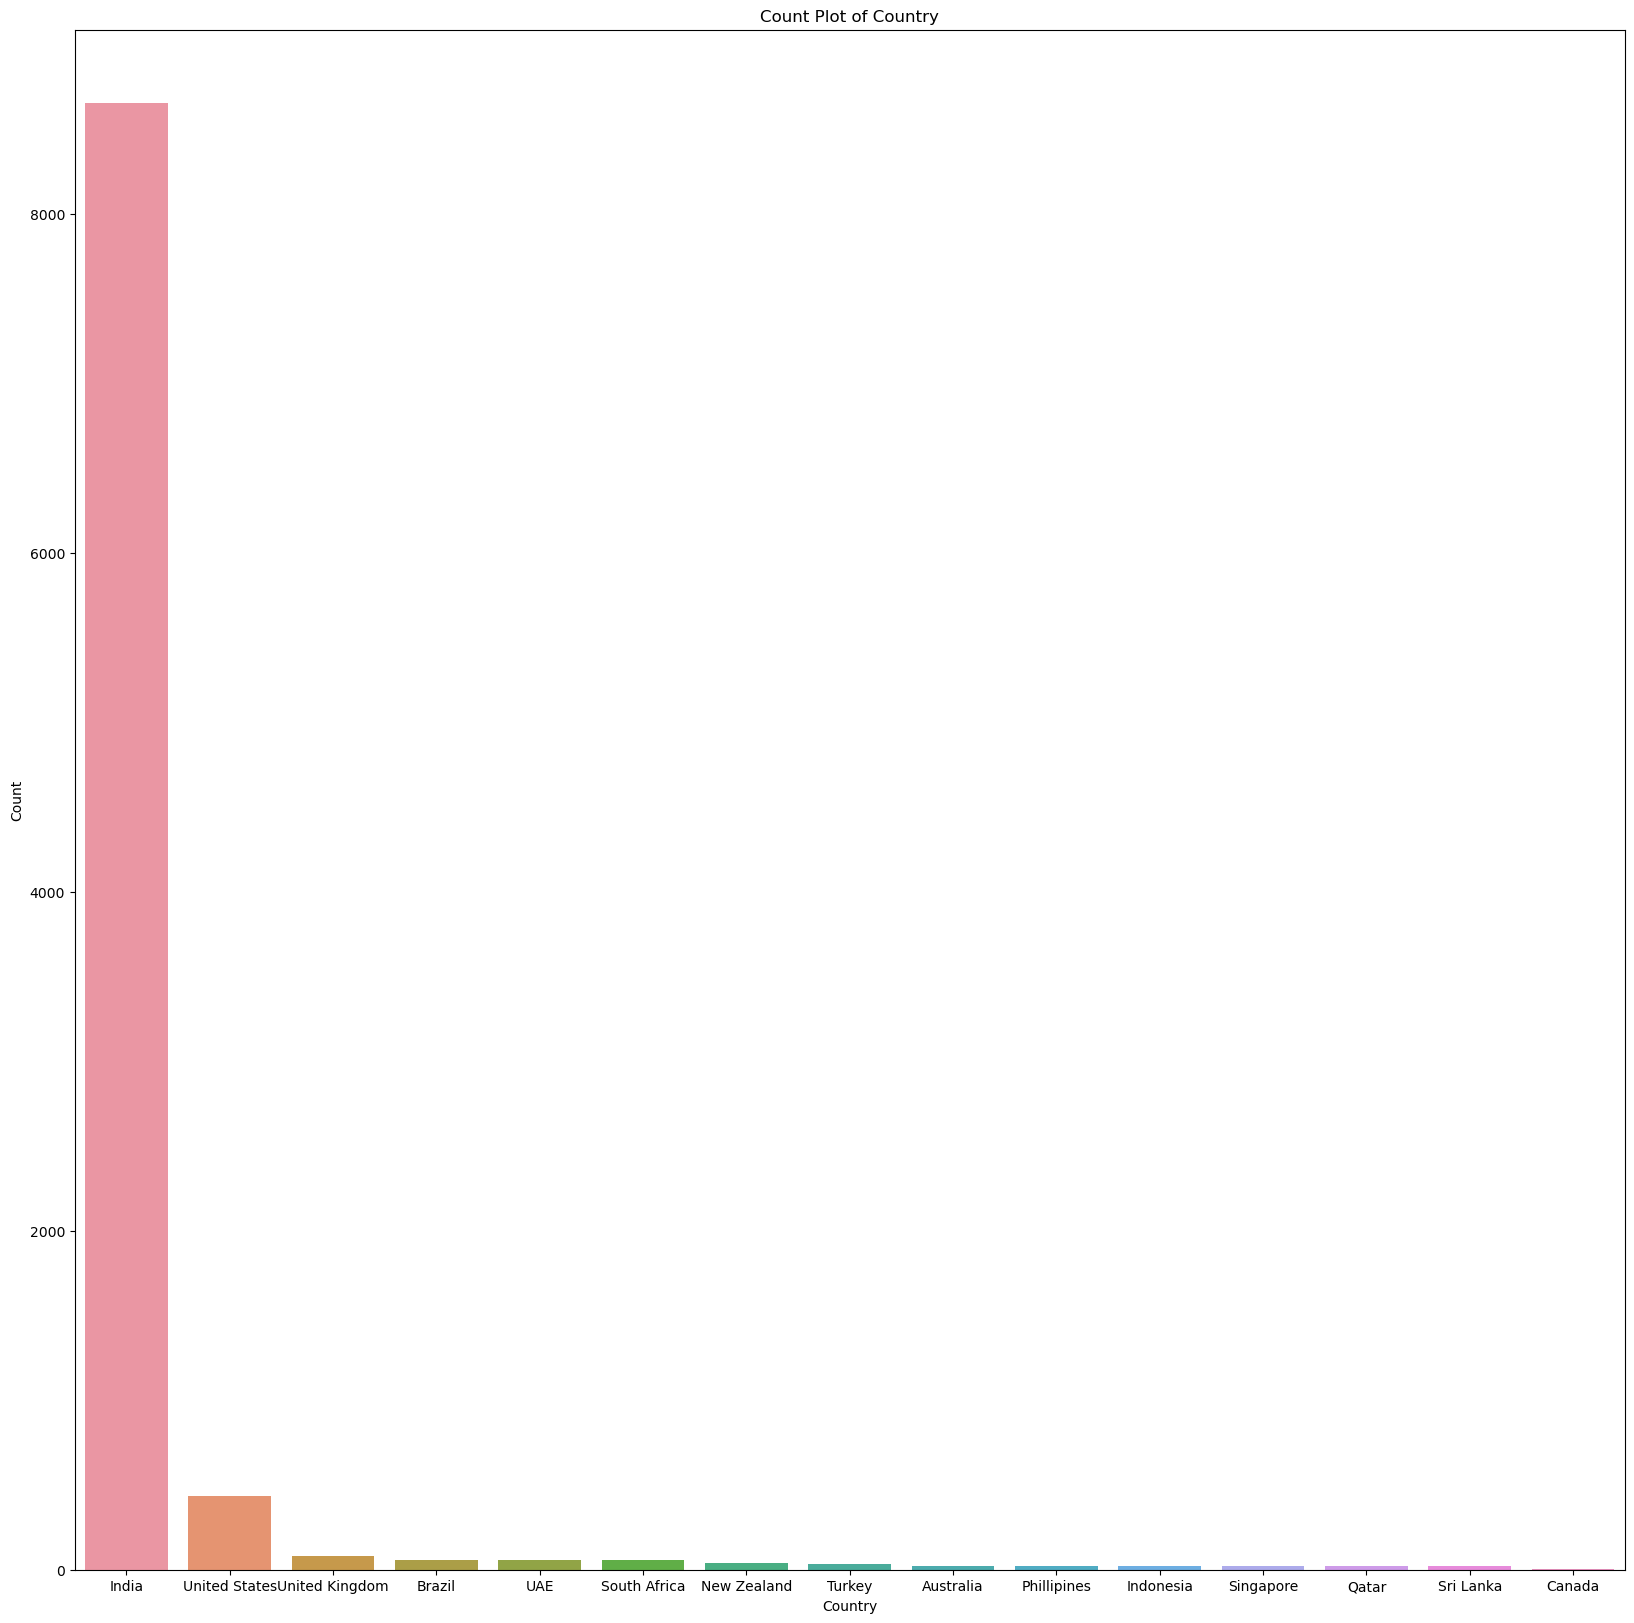

In [59]:
for col in categorical_columns:
    plt.figure(figsize=(20,20))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

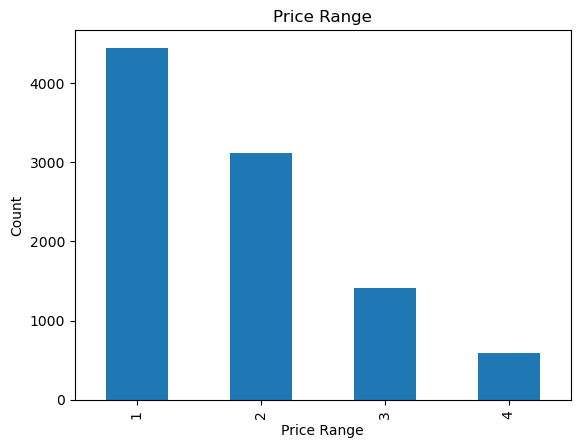

In [60]:
df['Price range'].value_counts().plot(kind='bar')
plt.title('Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [61]:
# The data seems to be imbalanced 

In [62]:
# City: there are 141 cities observations in our datasets. Out of which Majority being in Delhi. 

In [64]:
# Currency: There are 12 different currencies in our dataset. The Dominant Currency is Indian Rupee.

In [65]:
df['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [68]:
# Has Table booking: 0 and 1. 1 represents that the restaurant has table booking facility
# 0 represents that the restaurant does not have table booking facility
# The data seems to be imbalanced

In [69]:
# Is Delivering now: 0 and 1. 1 represents that the restaurant is delivering now
# 0 represents that the restaurant is not delivering now
# There are few restaurants that are delivering now
# The data seems to be imbalanced

In [70]:
# The Regarding to the  country, country code,the header is india, accounting for most of occurences,
# This feature also has relation with other features.So there can be a multicollinearity issue between this two
# The data seems to be imbalanced

In [72]:
# Numerical Columns

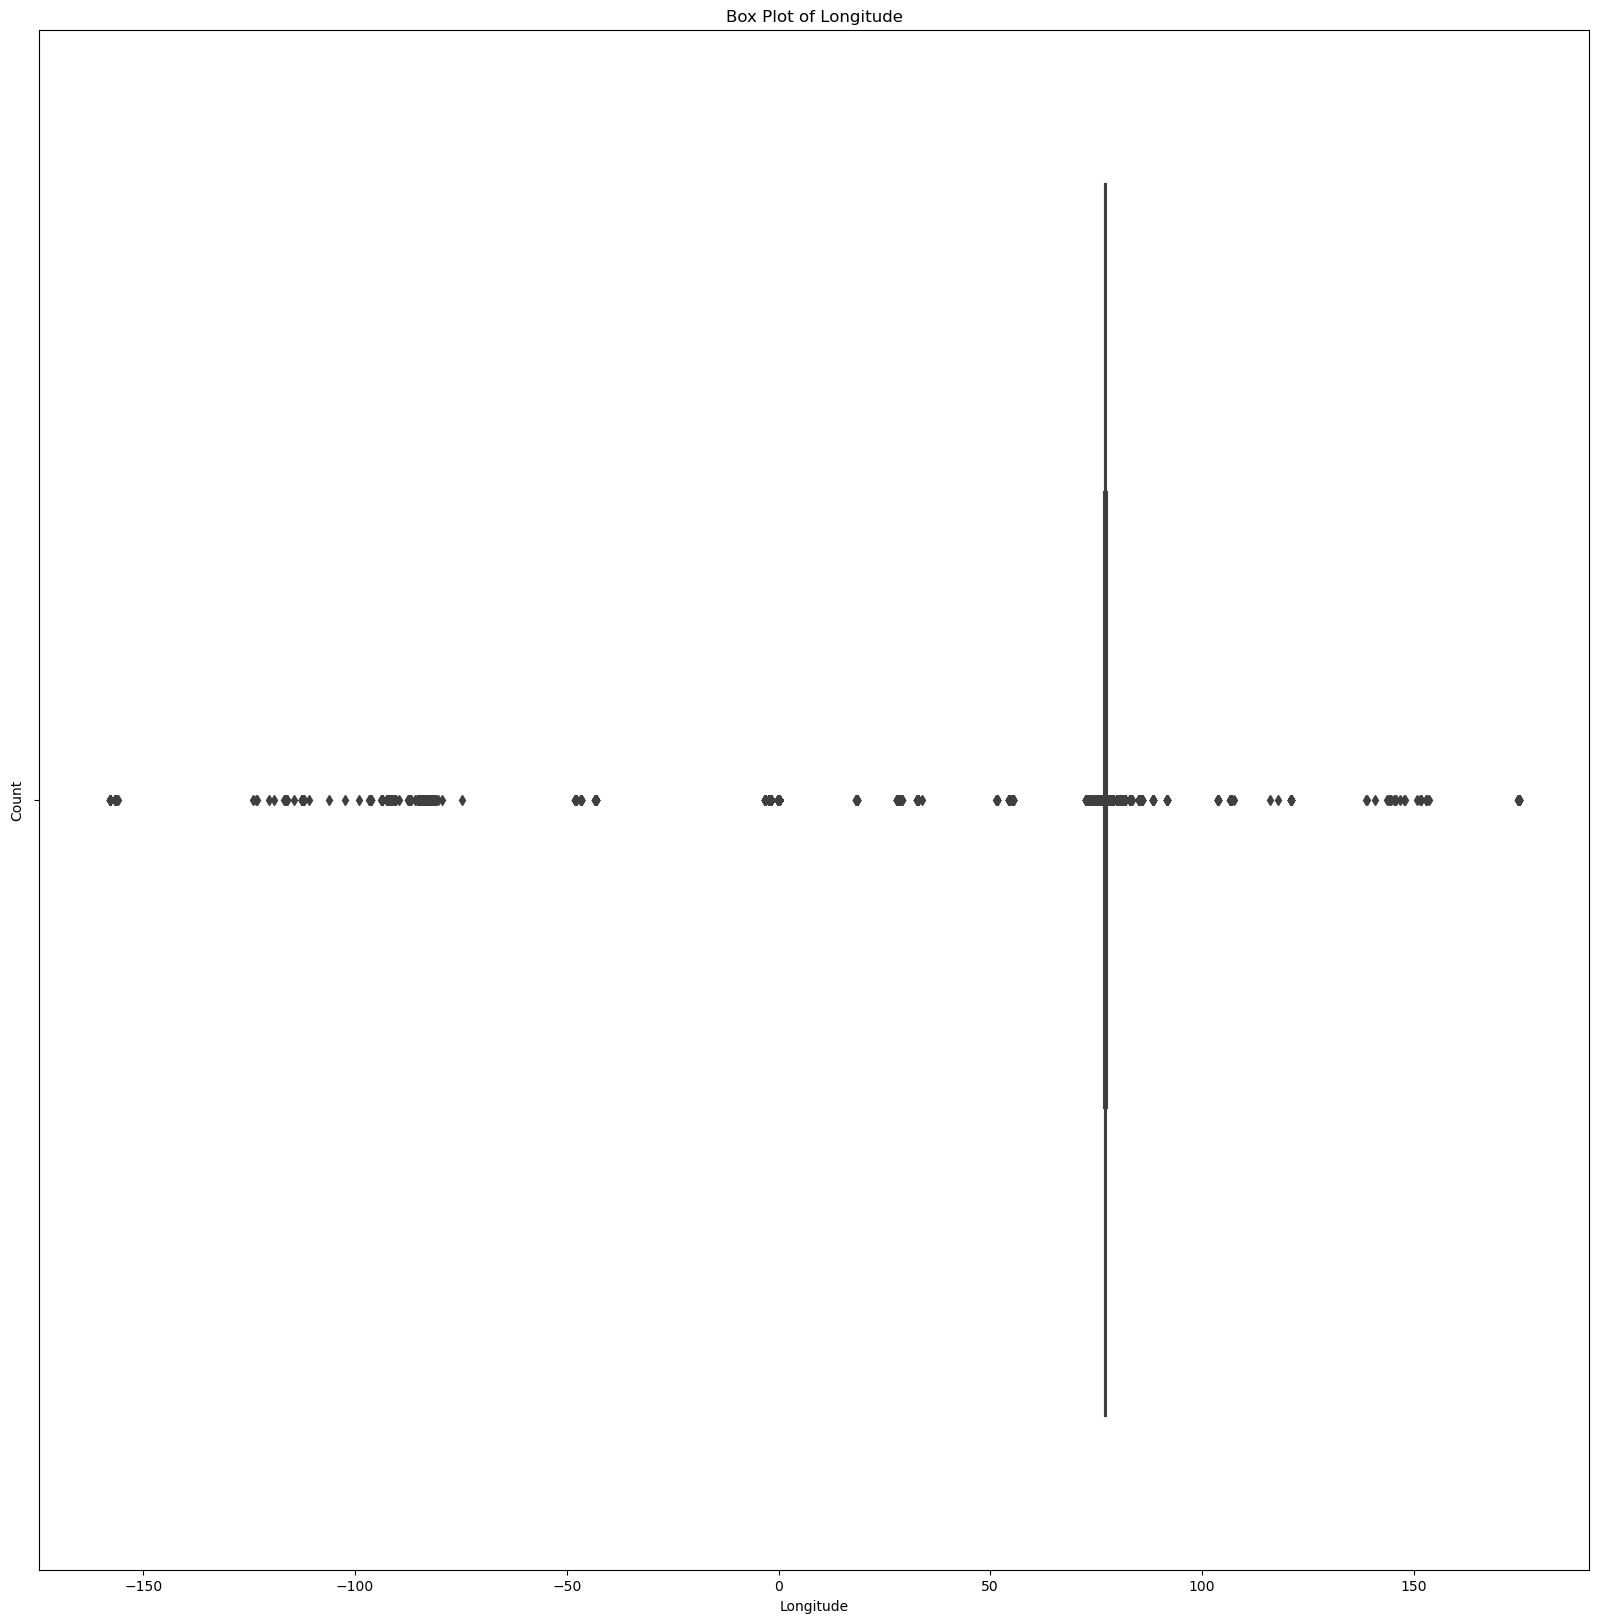

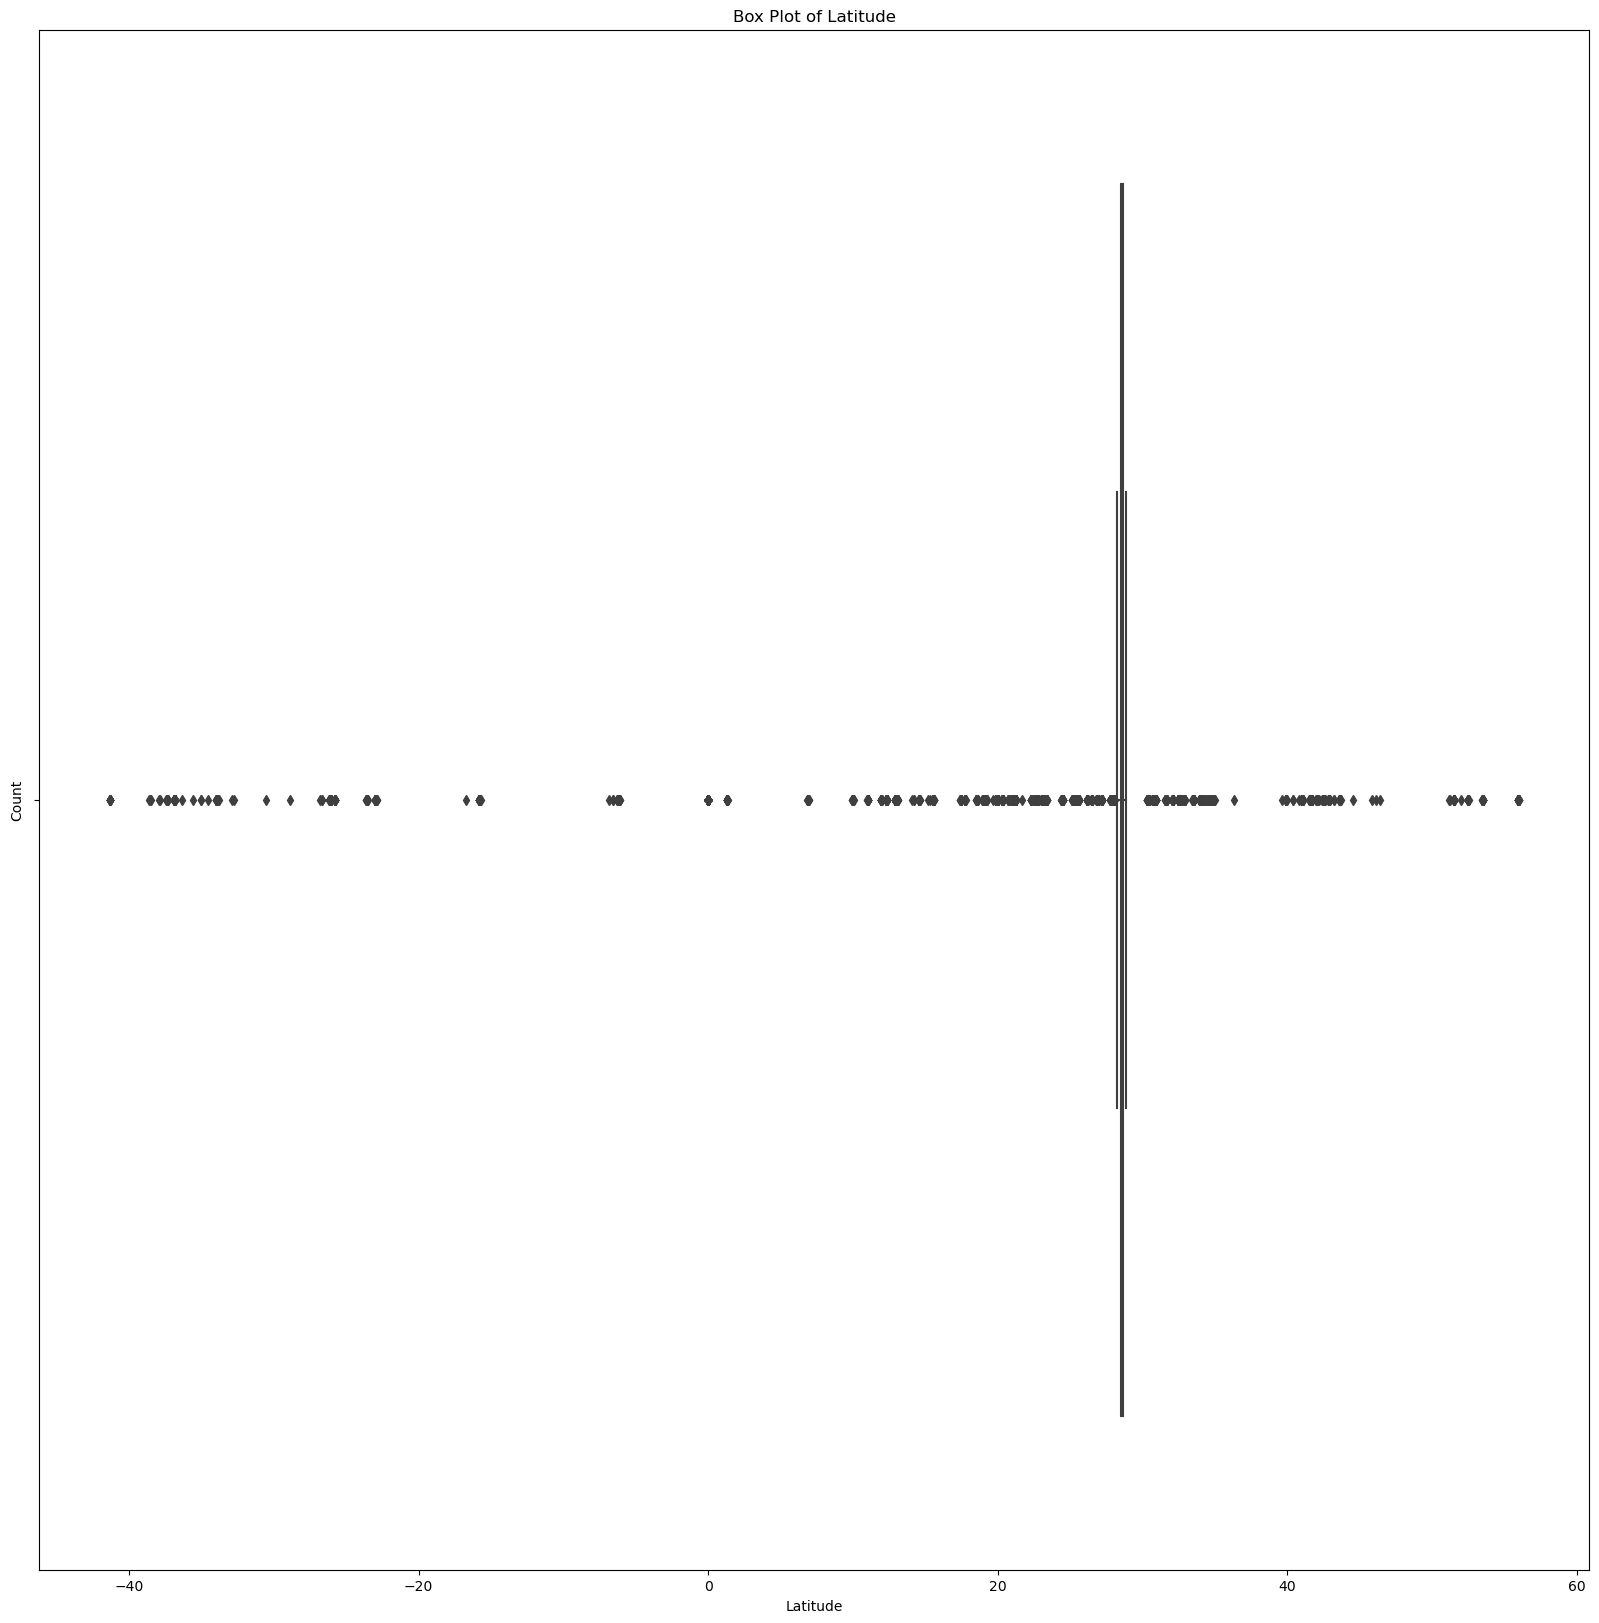

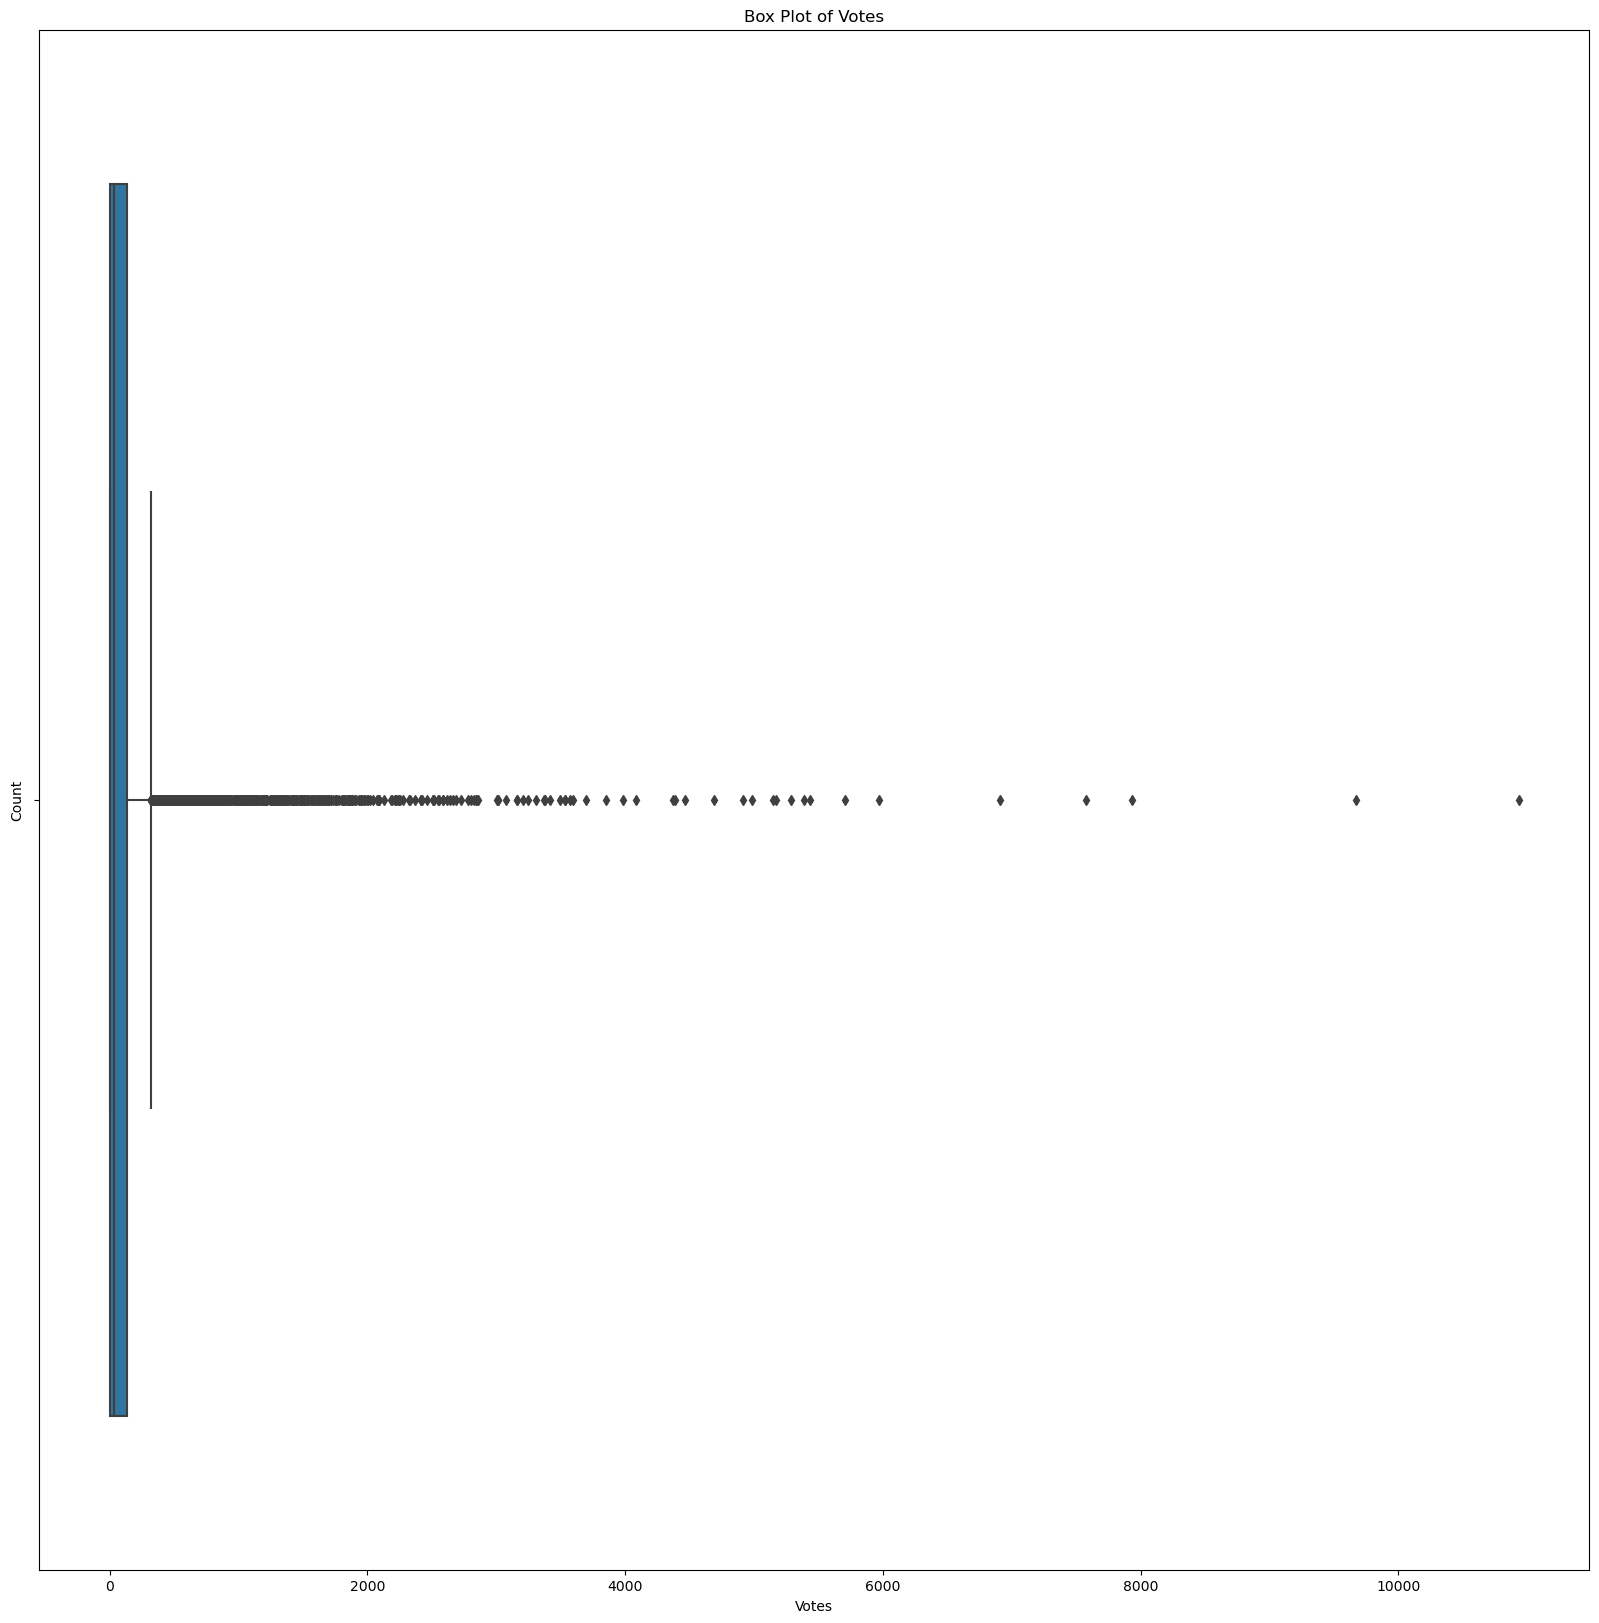

In [73]:
for col in numerical_columns:
    plt.figure(figsize=(20,20))
    sns.boxplot(x=col, data=df)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

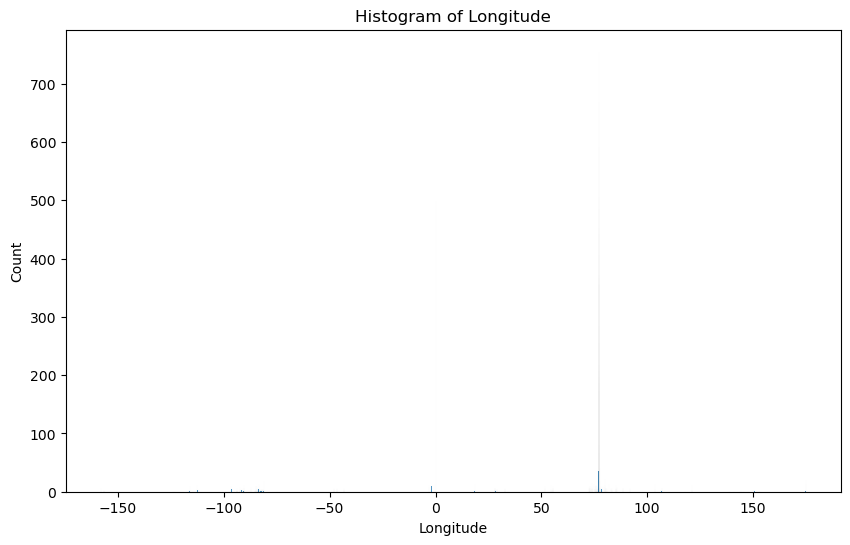

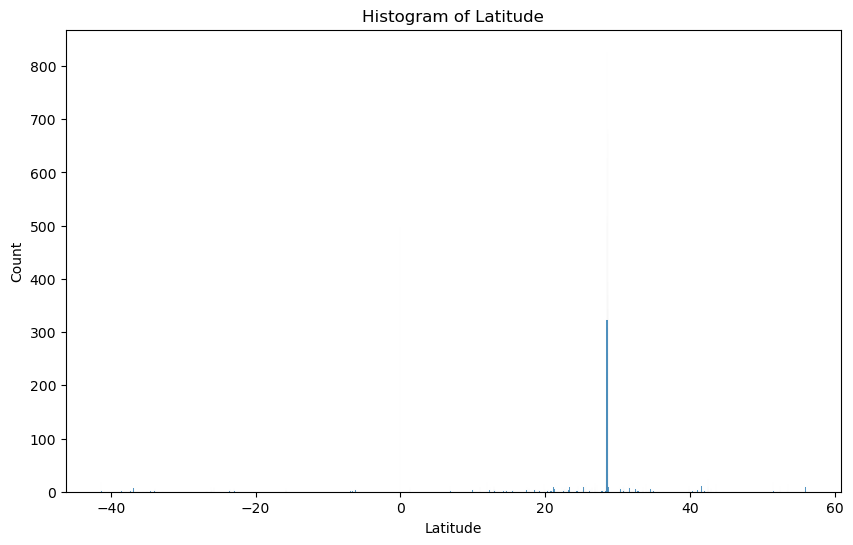

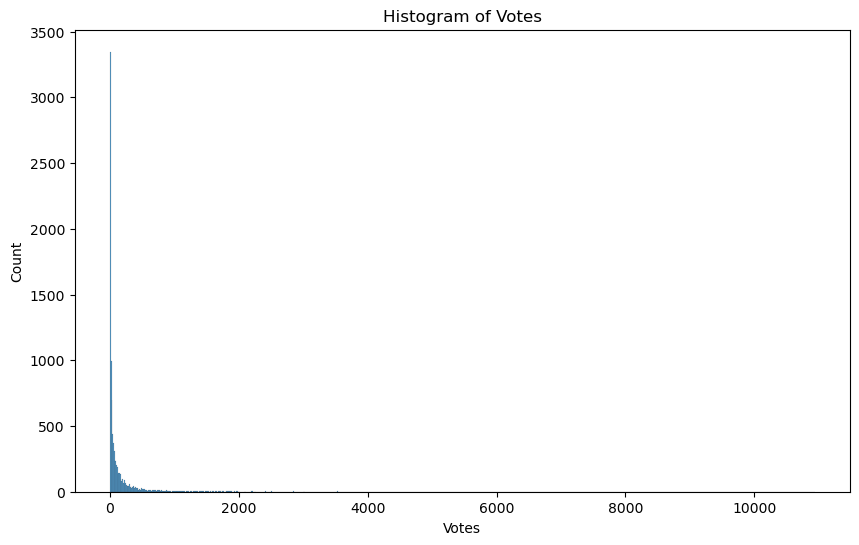

In [75]:
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(x=col, data=df)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [76]:
# The distribution of the 'longitude' seems to be left skewed . A Box plot represents the outliers in the feature 

In [77]:
# The distribution of the 'latitude' seems to be left skewed . A Box plot represents the outliers in the feature

In [78]:
# The distribution of 'Votes' is skewed to the right. A Box plot represents the outliers in the feature

In [79]:
# Bivariate Analysis

In [80]:
# Boxplot Analysis : Finding outliers and comparing 

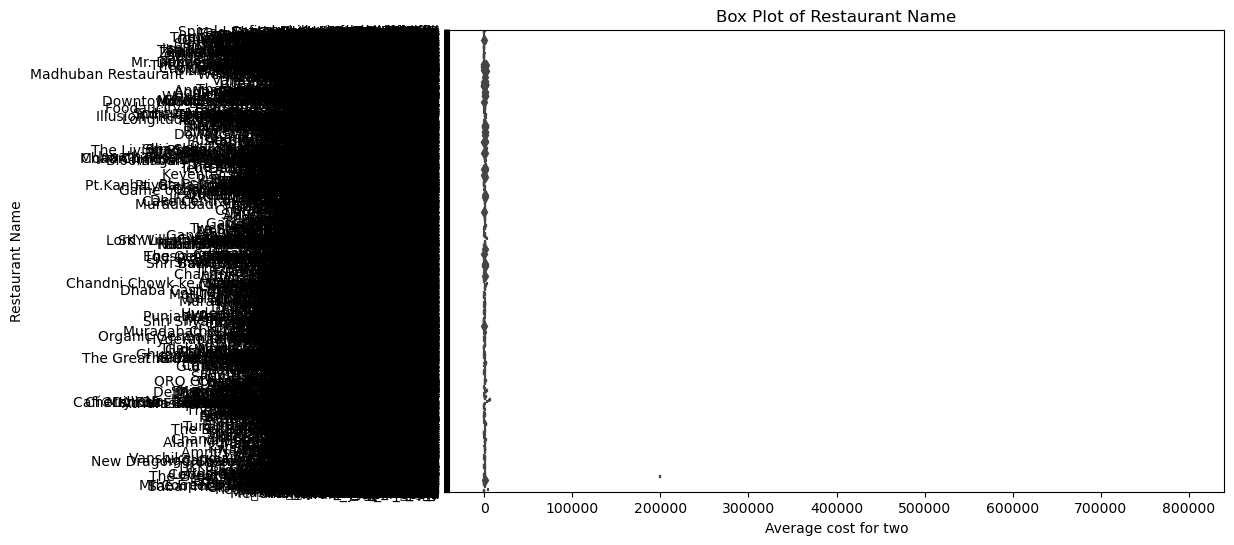

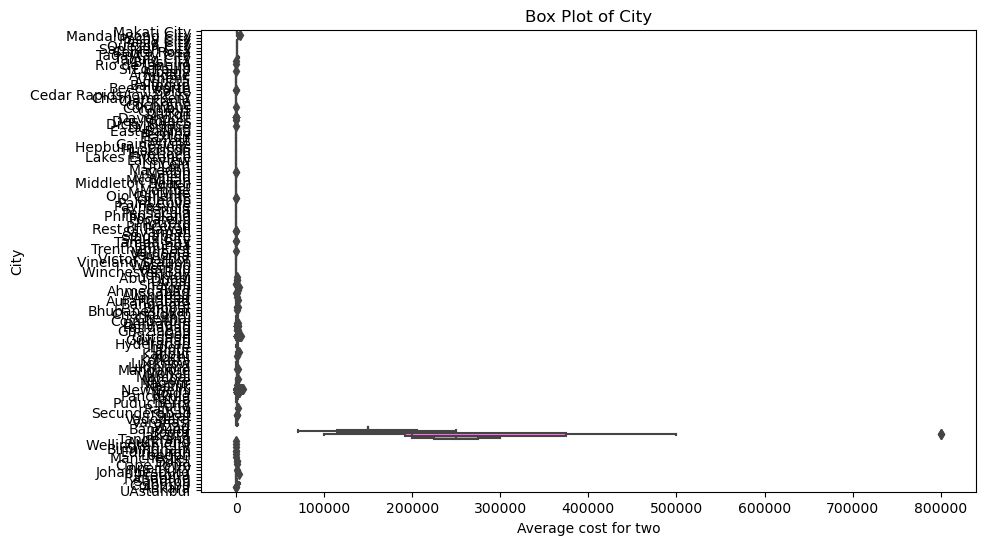

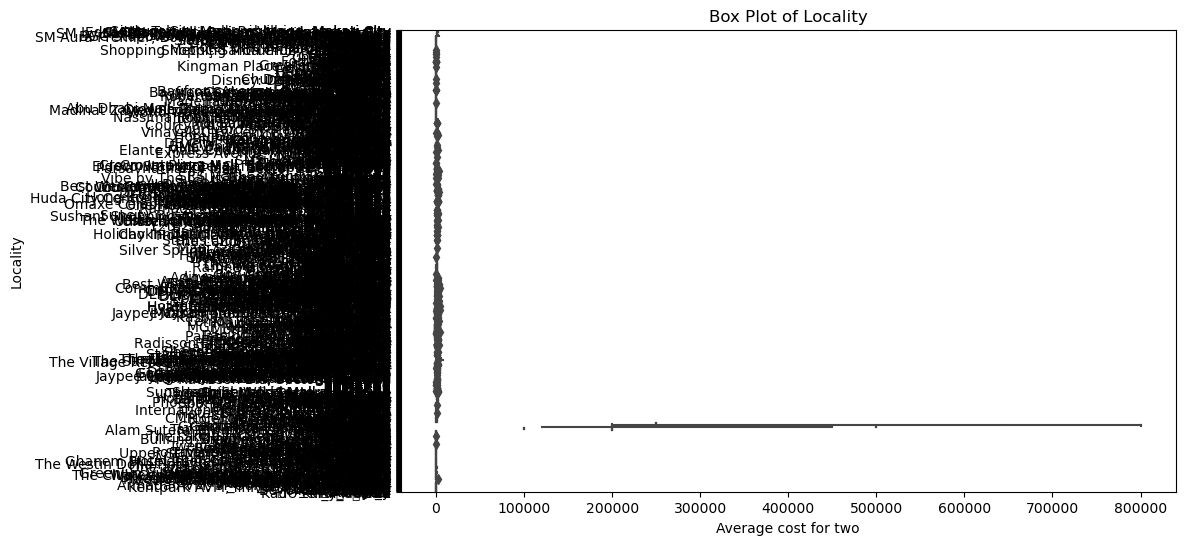

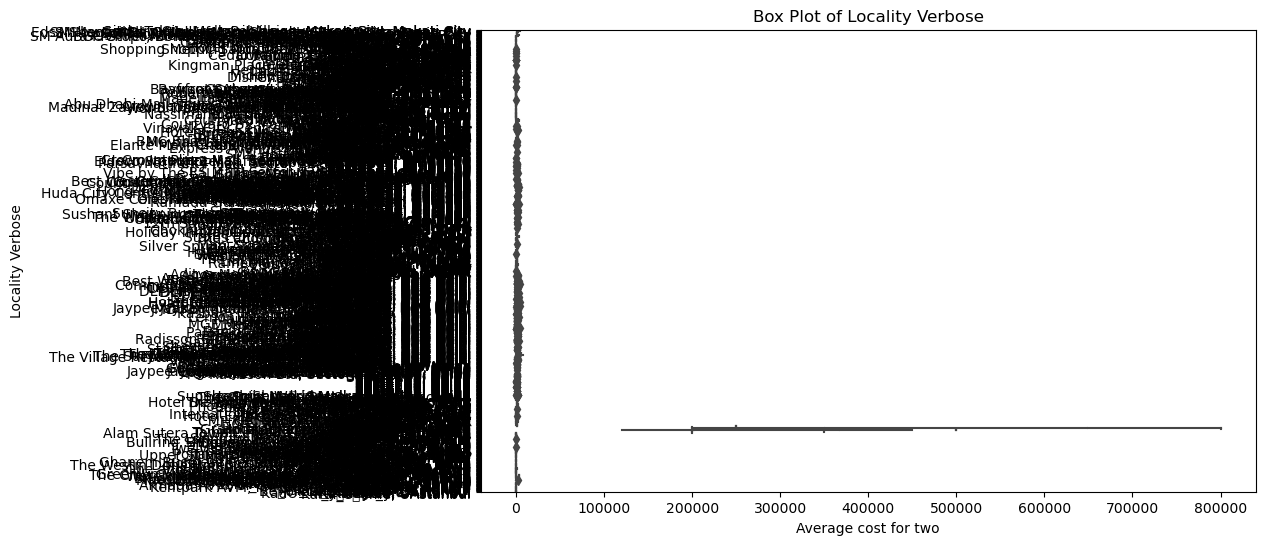

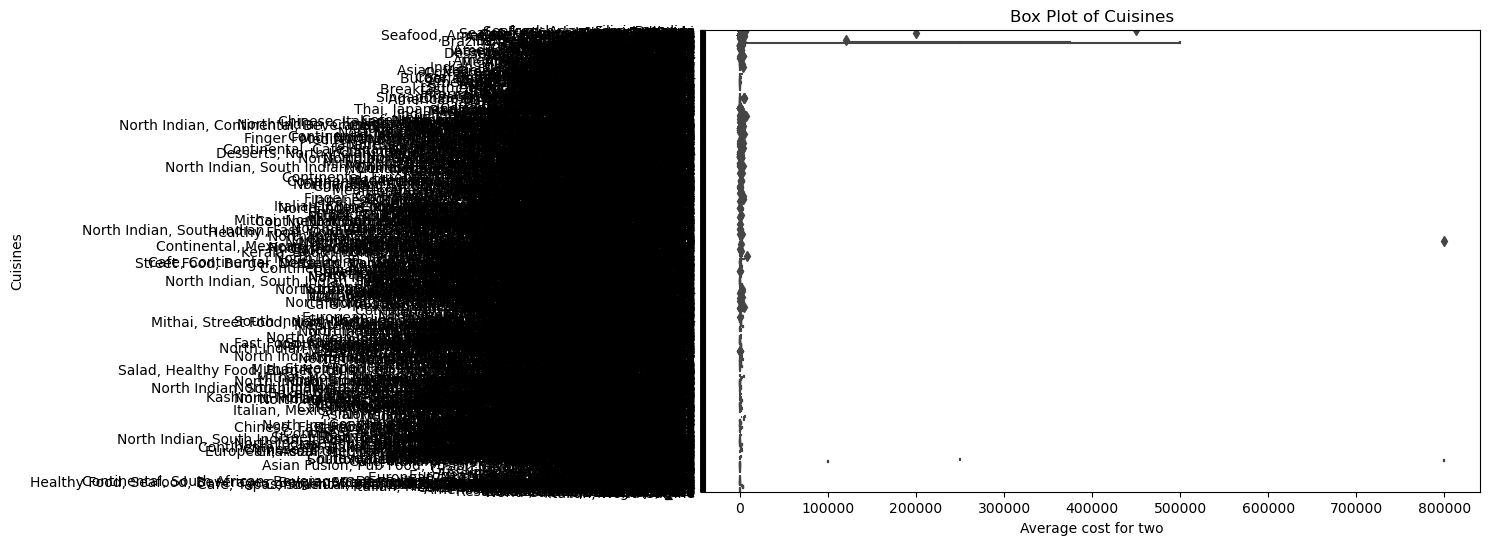

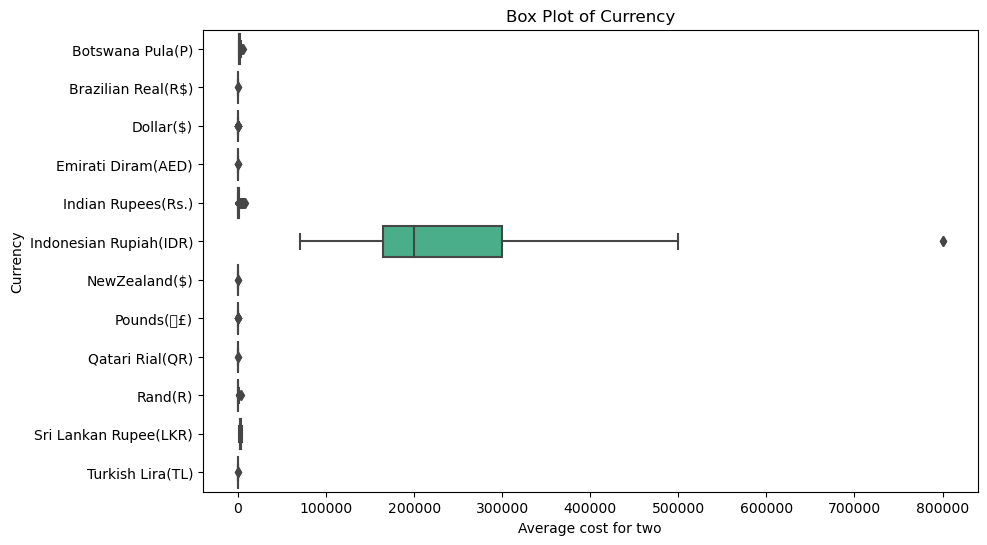

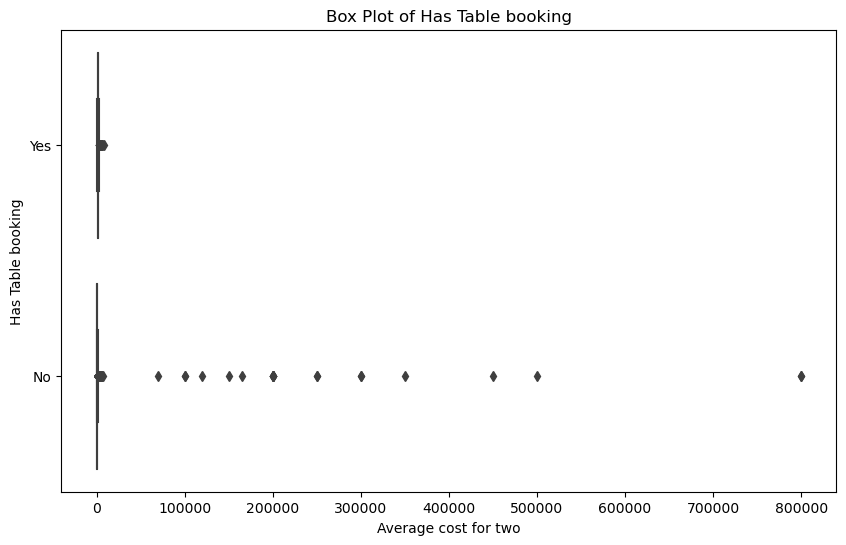

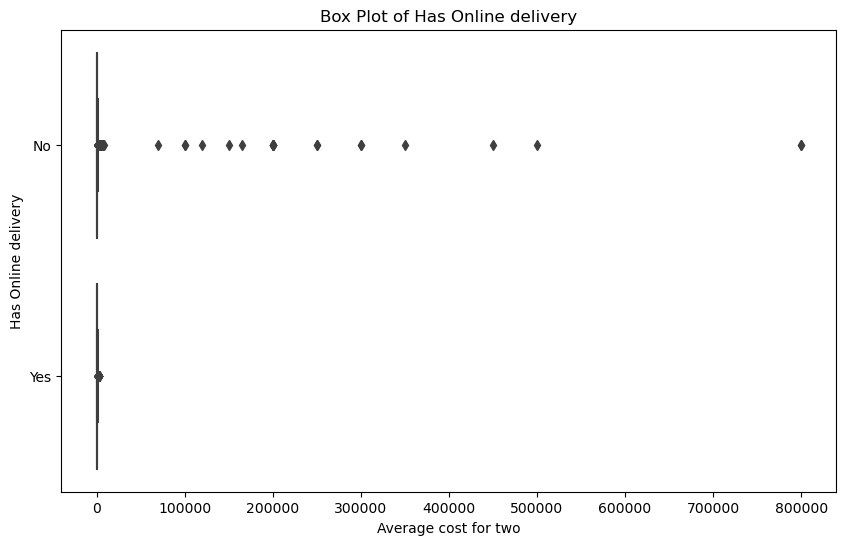

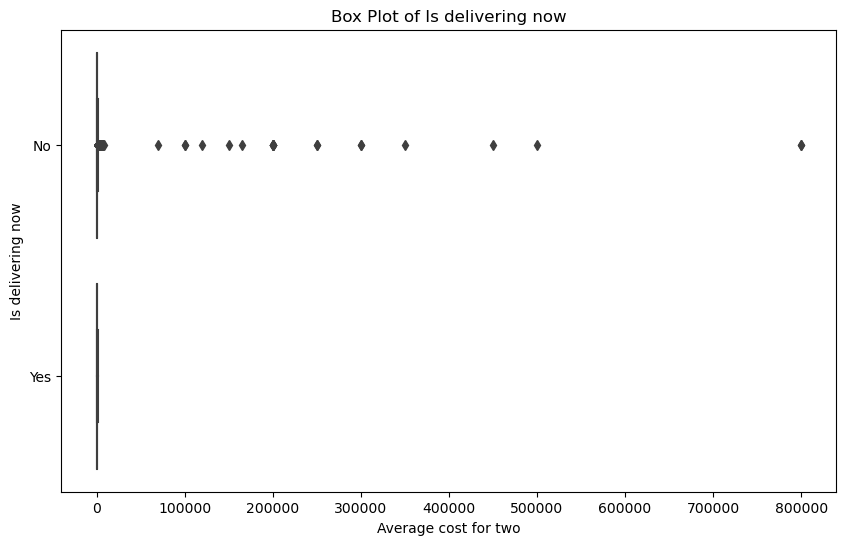

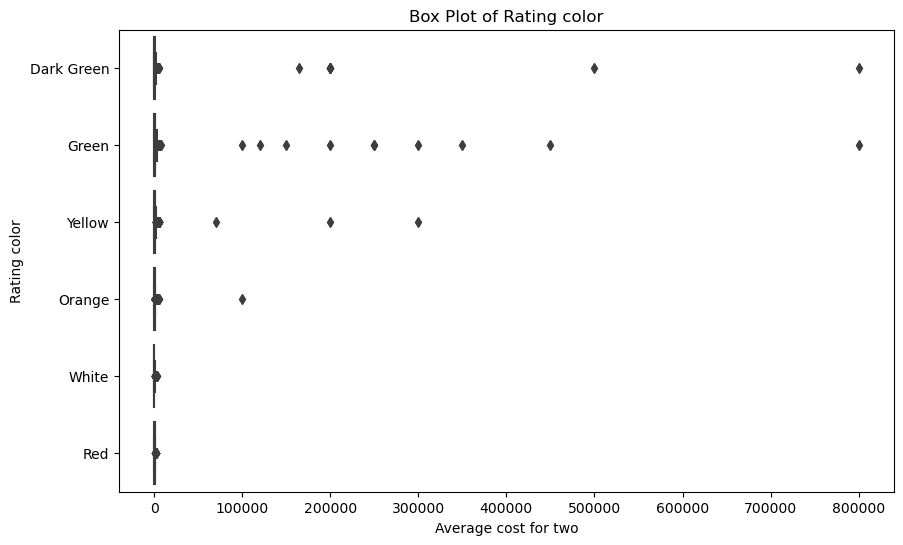

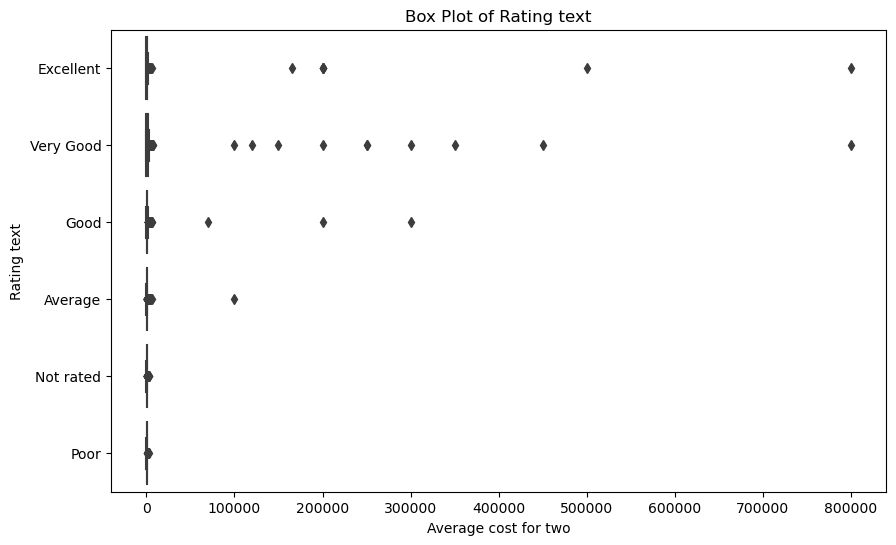

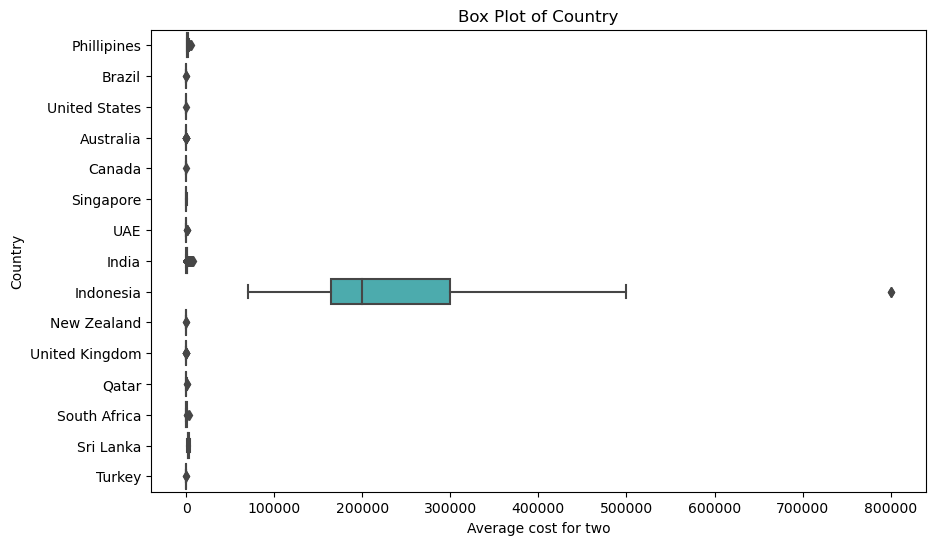

In [84]:
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Average Cost for two', y = col, data=df)
    plt.title(f"Box Plot of {col}")
    plt.xlabel("Average cost for two")
    plt.ylabel(col)
    plt.show()

In [85]:
# Multivariate Analysis

In [86]:
# Pairplot

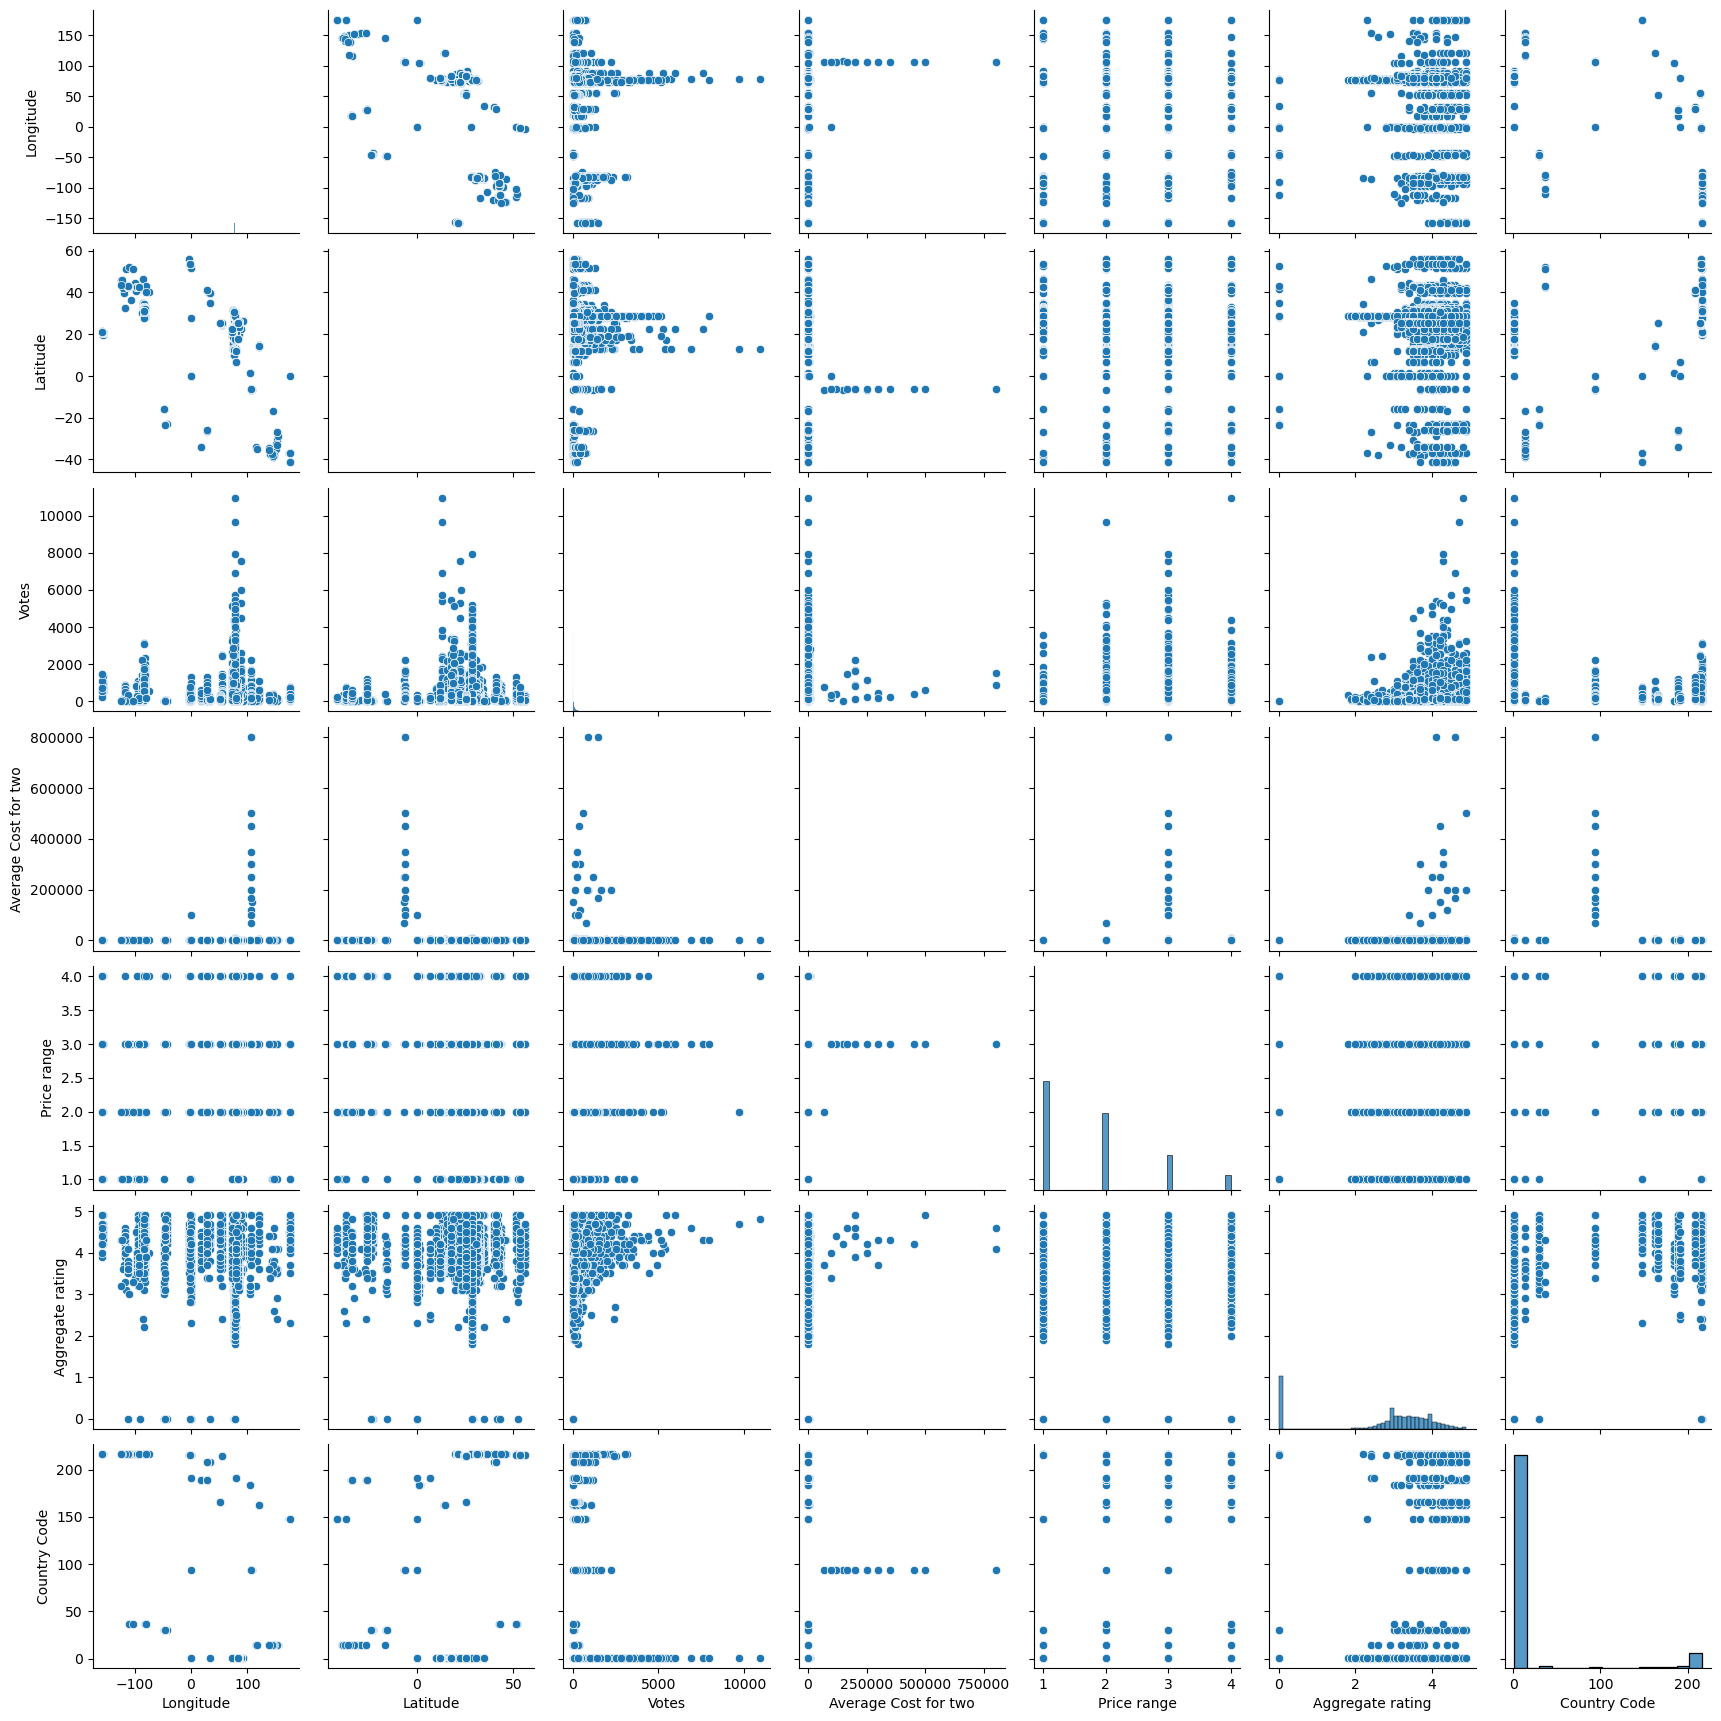

In [87]:
columns = ['Longitude', 'Latitude', 'Votes', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Country Code']
sns.pairplot(df[columns])
plt.show()

In [88]:
# We observe a moderate positive correlation between 'Average Cost for two' and 'Price range','Country Code' and 'Votes'
# Converely The 'Price range' variable shows weak correlation between the 'Votes', 'Country Code and 'Average Cost for two' variables

In [89]:
corr = df[columns].corr()

In [90]:
corr

,Longitude,Latitude,Votes,Average Cost for two,Price range,Aggregate rating,Country Code
Longitude,1.000000,0.043207,-0.085101,0.045891,-0.078939,-0.116818,-0.698299
Latitude,0.043207,1.000000,-0.022962,-0.111088,-0.166688,0.000516,0.019792
Votes,-0.085101,-0.022962,1.000000,0.067783,0.309444,0.313691,0.154530
Average Cost for two,0.045891,-0.111088,0.067783,1.000000,0.075083,0.051792,0.043225
Price range,-0.078939,-0.166688,0.309444,0.075083,1.000000,0.437944,0.243327
Aggregate rating,-0.116818,0.000516,0.313691,0.051792,0.437944,1.000000,0.282189
Country Code,-0.698299,0.019792,0.154530,0.043225,0.243327,0.282189,1.000000


In [91]:
# The correlation analysis shows a weak positive relation between the target variable 'Average Cost for two' and the following 
# features: 'Price range','Country Code' and 'Votes','Aggregate rating','Longitude' and 'Latitude'

In [92]:
# The correlation analysis shows a moderate positive relation between the target variable 'Price range' and the following 
# features: 'Average Cost for two','Votes','Country Code' and 'Aggregate rating','Longitude' and 'Latitude'

In [93]:
# The relationship with other variables are weak

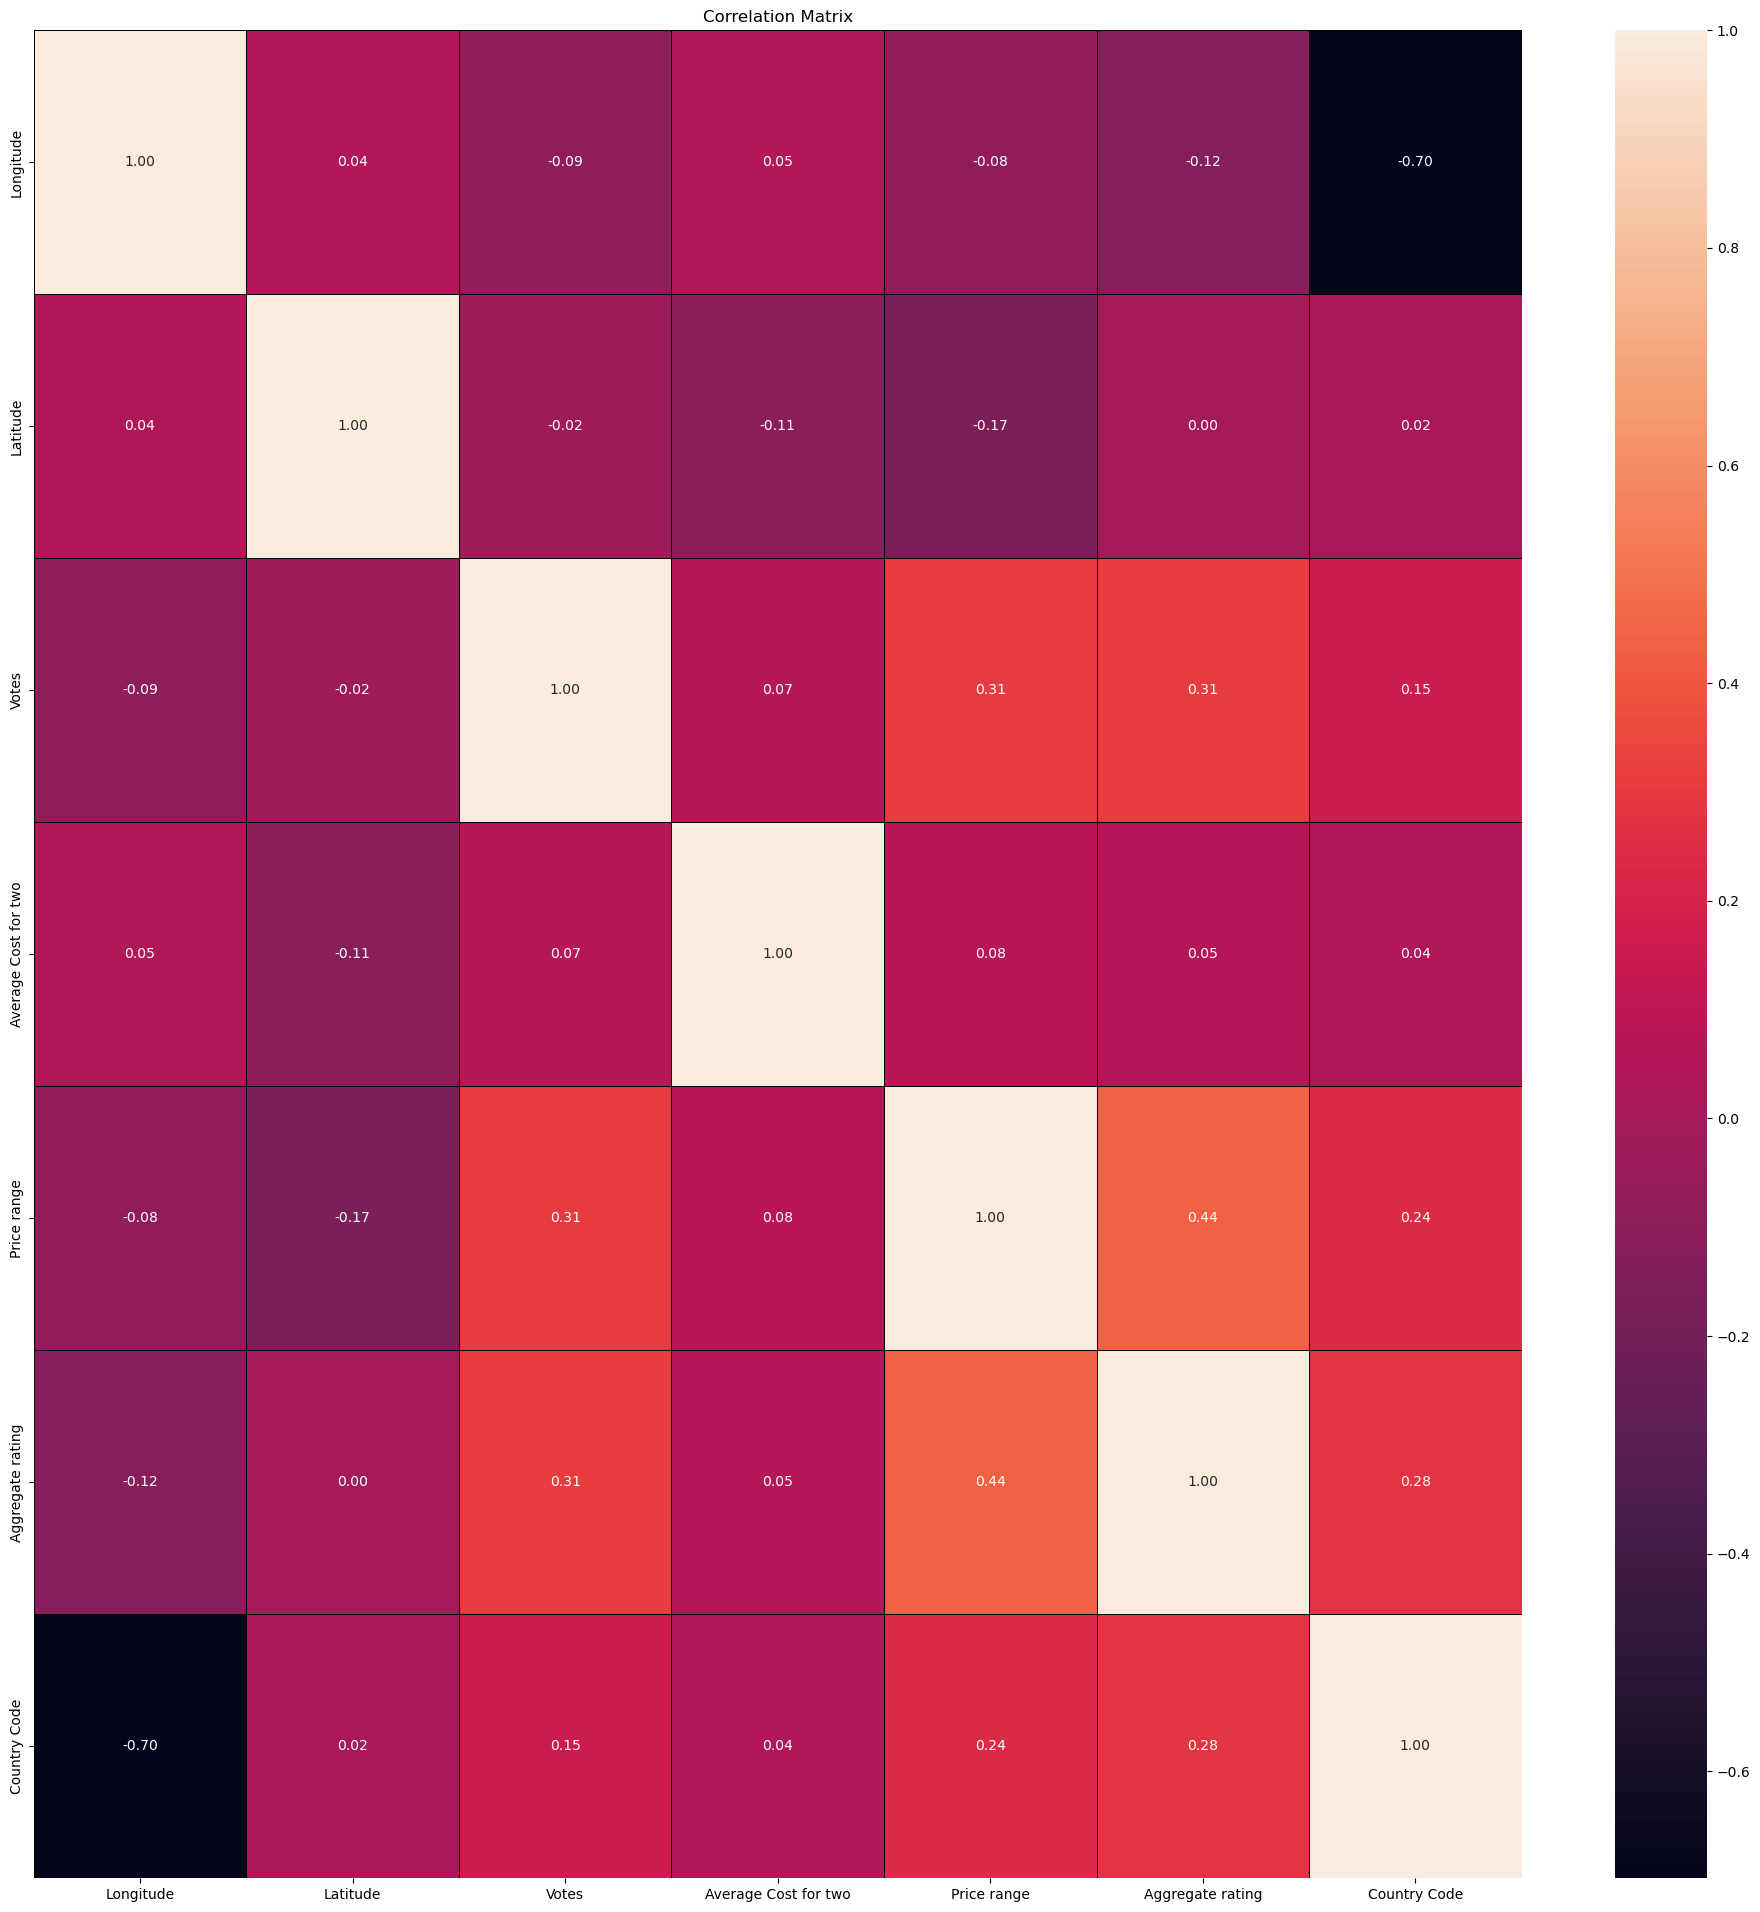

In [94]:
plt.figure(figsize = (24,24))
sns.heatmap(corr, annot = True, linewidth = 0.5, linecolor = 'black', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [95]:
# The variable 'Average Cost for two' exihibits a weak correlation with other variables

In [96]:
# The 'Price Range' shows a moderate positive correlation with 'Aggregate rating', 'Country Code' and 'Votes

In [97]:
# 'Country Code' demonstrate a moderate positive correlation with 'Longitude'

In [98]:
# Preprocessing Data

In [99]:
# It was identified that the dataset contains missing values in the 'Cuisines' column 

In [100]:
# Dropping Missing Values

In [101]:
df_new = df.dropna(axis = 0, subset = ['Cuisines'])

In [103]:
df_new.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [104]:
# There are no null values in the datasets

In [105]:
df = df_new.copy()

In [107]:
freq_encod = df['Restaurant Name'].value_counts().to_dict()
df['RestaurantName_enc'] = df['Restaurant Name'].map(freq_encod)
print(df[['RestaurantName_enc', 'Restaurant Name']].head(5))

   RestaurantName_enc         Restaurant Name
0                   1        Le Petit Souffle
1                   1        Izakaya Kikufuji
2                   1  Heat - Edsa Shangri-La
3                   1                    Ooma
4                   1             Sambo Kojin


In [109]:
freq_encod

{'Cafe Coffee Day': 83,
 "Domino's Pizza": 79,
 'Subway': 63,
 'Green Chick Chop': 51,
 "McDonald's": 48,
 'Keventers': 34,
 'Pizza Hut': 30,
 'Giani': 29,
 'Baskin Robbins': 28,
 'Barbeque Nation': 26,
 "Giani's": 22,
 'Barista': 22,
 "Dunkin' Donuts": 22,
 'Pind Balluchi': 20,
 'Costa Coffee': 20,
 'Wah Ji Wah': 19,
 'Twenty Four Seven': 19,
 'Sagar Ratna': 19,
 'Pizza Hut Delivery': 19,
 'Starbucks': 18,
 'KFC': 18,
 'Republic of Chicken': 18,
 'Chaayos': 18,
 "Haldiram's": 16,
 'Burger King': 16,
 'Shree Rathnam': 15,
 'Aggarwal Sweets': 14,
 'Frontier': 14,
 'Bikanervala': 14,
 'Moti Mahal Delux': 14,
 'Bikaner Sweets': 13,
 'Behrouz Biryani': 13,
 "Karim's": 13,
 '34, Chowringhee Lane': 12,
 'Chicago Pizza': 12,
 'Apni Rasoi': 12,
 'Burger Point': 11,
 'Wow! Momo': 11,
 'Madras Cafe': 11,
 'Gopala': 10,
 "Nirula's Ice Cream": 9,
 'Sardar A Pure Meat Shop': 9,
 'Yo! China': 9,
 'Shama Chicken Corner': 9,
 "Berco's": 9,
 'Cocoberry': 9,
 'Ovenstory Pizza': 8,
 'Angels in my Kitchen

In [110]:
# 'Locality' and 'Locality Verbose' Columns both provide similiar information so we can drop one of them

In [111]:
frequency_map_loc = df['Locality'].value_counts().to_dict()

df['Locality_enc'] = df['Locality'].map(frequency_map_loc)

print(df[['Locality', 'Locality_enc']].head())

                                     Locality  Locality_enc
0   Century City Mall, Poblacion, Makati City             1
1  Little Tokyo, Legaspi Village, Makati City             1
2  Edsa Shangri-La, Ortigas, Mandaluyong City             1
3      SM Megamall, Ortigas, Mandaluyong City             3
4      SM Megamall, Ortigas, Mandaluyong City             3


In [112]:
frequency_map_loc

{'Connaught Place': 122,
 'Rajouri Garden': 99,
 'Shahdara': 87,
 'Defence Colony': 86,
 'Pitampura': 85,
 'Malviya Nagar': 85,
 'Mayur Vihar Phase 1': 84,
 'Rajinder Nagar': 81,
 'Safdarjung': 80,
 'Satyaniketan': 79,
 'Krishna Nagar': 77,
 'Sector 62': 76,
 'Karol Bagh': 76,
 'Sector 18': 75,
 'Hauz Khas': 74,
 'Kalkaji': 73,
 'Sector 15': 71,
 'DLF Phase 3': 69,
 'Mahipalpur': 69,
 'Mukherjee Nagar': 68,
 'Chandni Chowk': 67,
 'Shalimar Bagh': 67,
 'Greater Kailash (GK) 1': 66,
 'Greater Kailash (GK) 2': 66,
 'Kamla Nagar': 65,
 'Delhi University-GTB Nagar': 65,
 'Paharganj': 64,
 'MG Road': 63,
 'Vasundhara Enclave': 62,
 'Jail Road': 61,
 'Tilak Nagar': 61,
 'Sector 72': 61,
 'Palam': 60,
 'Najafgarh': 60,
 'Vikaspuri': 60,
 'Punjabi Bagh': 60,
 'Uttam Nagar': 59,
 'Sector 56': 59,
 'Laxmi Nagar': 58,
 'Dilshad Garden': 57,
 'Jangpura': 57,
 'Paschim Vihar': 56,
 'East of Kailash': 56,
 'Kirti Nagar': 56,
 'Naraina': 54,
 'Sector 110': 53,
 'Sector 14': 52,
 'Sector 31': 52,
 'Sub

In [113]:
# Encoding binary columns 

In [114]:
# Listing the unique values to encode 
features = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
for col in features:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [116]:
# Listing the encoded values to encode
for col in features:
    print(f"Encoded values for {col}: {df[col].unique()}")

Encoded values for Has Table booking: [1 0]
Encoded values for Has Online delivery: [0 1]
Encoded values for Is delivering now: [0 1]


In [117]:
# Values are encoded

In [118]:
# Encoding Categorical_columns

In [119]:
encoding_cols = ['Currency', 'City', 'Rating text']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [122]:
df['City'].unique()

array([ 73,  75,  93,  94, 106, 111, 113, 121, 122,  21, 110, 120,   3,
         7,   8,  10,  12,  15,  20,  23,  25,  27,  28,  31,  32,  33,
        34,  36,  37,  40,  41,  44,  45,  46,  47,  52,  53,  57,  64,
        65,  66,  68,  71,  72,  77,  78,  79,  81,  82,  89,  90,  91,
        96,  97,  98,  99, 100, 101, 103, 109, 114, 117, 118, 123, 125,
       126, 128, 130, 131, 132, 134, 135, 137, 138,   0,  39, 116,   1,
         2,   4,   5,  11,  14,  16,  17,  24,  26,  29,  35,  43,  48,
        49,  50,  51,  54,  55,  58,  61,  62,  63,  69,  70,  76,  80,
        83,  84,  85,  86,  87,  88,  92,  95, 104, 105, 107, 115, 119,
       127, 129, 133,  13,  19,  59, 124,   9, 136,  18,  42,  67,  74,
        38,  22,  56,  60, 102, 108, 112,  30,   6, 139])

In [123]:
df['Currency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [124]:
df['Rating text'].unique()

array([1, 5, 2, 0, 3, 4])

In [125]:
# Values are encoded

In [127]:
# To Reduce Dimensionality and capture Location Patterns we plan to employ unsupervised K-Means Clustering algorithms

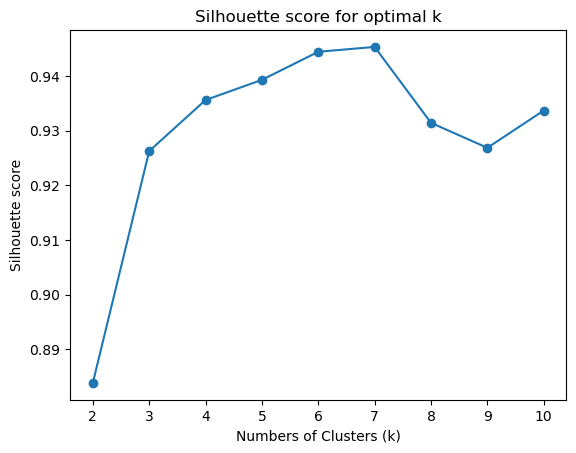

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit Kmeans for a range of values
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    labels = kmeans.fit_predict(df[['Latitude', 'Longitude']])
    score = silhouette_score(df[['Latitude', 'Longitude']], labels)
    silhouette_scores.append(score)
 
# Plot the results
plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Numbers of Clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for optimal k')
plt.show()

In [131]:
# Elbow Method

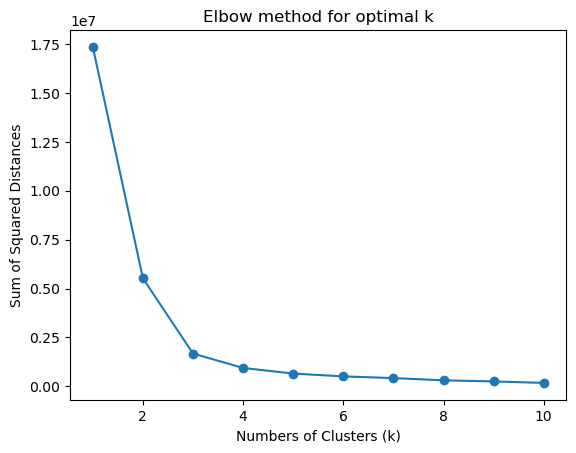

In [132]:
# Fit Kmeans for a range of values
k_values = range(1,11)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df[['Latitude', 'Longitude']])
    inertias.append(kmeans.inertia_)
    
# Plot the Elbow Curve
plt.plot(k_values, inertias, marker = 'o')
plt.xlabel('Numbers of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow method for optimal k')
plt.show()

In [133]:
# We will apply the k = 5 to create the location cluster based on latitude and longitude
kmeans = KMeans(n_clusters = 5, random_state = 42)
df['loc_cluster_col'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

In [134]:
df['loc_cluster_col'].value_counts()

loc_cluster_col
0    8316
2     617
1     429
4     116
3      64
Name: count, dtype: int64

In [ ]:
# Grouping or Aggregating Categories based on 'Cuisine' Features

In [138]:
# Get all the unique categories of cuisines
all_cuisines = set()
for cuisines in df['Cuisines'].str.split(','):
    all_cuisines.update(cuisines)
    
# Create binary columns for each cuisine    
for cuisine in all_cuisines:
    df[cuisine] = df['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

In [139]:
display(df[list(all_cuisines)])

,Italian,Greek,Desserts,World Cuisine,Afghani,Gujarati,South American,Drinks Only,Caribbean,Scottish,...,Cuisine Varies,Grill,Vietnamese,Afghani,Fast Food,Korean,Bar Food,North Indian,International,Lucknowi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9547,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
# Dropping Unnecessary columns 

In [141]:
columns = ['Restaurant Name',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Rating color',
 'Country']
df.drop(columns, inplace = True, axis = 1)

In [142]:
df.shape

(9542, 265)

In [135]:
# Removing outliers

In [143]:
# We have selected columns with outliers on the basis of univariate analysis

In [145]:
features_with_outliers = ['Average Cost for two', 'Votes', 'Aggregate rating']
from scipy.stats import zscore
z = np.abs(zscore(df[features_with_outliers]))
z

,Average Cost for two,Votes,Aggregate rating
0,0.006221,0.365493,1.407683
1,0.000020,1.009408,1.209860
2,0.173592,0.263210,1.143919
3,0.018581,0.484048,1.473624
4,0.018581,0.167901,1.407683
...,...,...,...
9546,0.069465,1.467355,0.946096
9547,0.067915,2.039208,1.012037
9548,0.063885,1.172130,0.682332
9549,0.066985,1.730035,0.880155


In [146]:
threshold = 3
df_new = df[(z < threshold ).all(axis = 1)]

In [148]:
df.shape

(9542, 265)

In [147]:
df_new.shape

(9353, 265)

In [149]:
# 189 rows are removed with outliers

In [163]:
df = df_new.copy()

In [164]:
# Skewness Correction

In [165]:
df_skew = df.drop(list(all_cuisines),axis = 1).skew().sort_values(ascending = False).to_frame("Skew")

In [166]:
df_skew

,Skew
Is delivering now,16.497854
RestaurantName_enc,4.461104
Average Cost for two,3.620465
Votes,3.219845
loc_cluster_col,3.213089
Country Code,3.095193
Currency,2.906753
Has Table booking,2.380822
Has Online delivery,1.118600
Price range,0.933887


In [167]:
# We are going to which features with a skew greater than 0.5 and apply transform methods to those features

In [168]:
# Subsetting the feature with a skew > 0.5
skew_features = df_skew[df_skew['Skew'] > 0.5].index
skew_features

Index(['Is delivering now', 'RestaurantName_enc', 'Average Cost for two',
       'Votes', 'loc_cluster_col', 'Country Code', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range'],
      dtype='object')

In [169]:
# We will focus on numerical columns like 'Average Cost for two', 'Votes', 'Aggregate rating'

In [170]:
skew_columns = ['Average Cost for two', 'Votes', 'Aggregate rating']

In [171]:
# We will apply Cube root transform method to those columns
df[skew_columns] = df[skew_columns].apply(np.cbrt)

In [172]:
df[skew_columns].skew()

Average Cost for two    0.477734
Votes                   0.690512
Aggregate rating       -1.242807
dtype: float64

In [173]:
# Feature Scaling using Standarad Scalerization

In [174]:
# Seperating features for regression model to predict 'Average cost for two'

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop(['Average Cost for two'], axis = 1)
y = df['Average Cost for two']

In [176]:
x.shape

(9353, 264)

In [177]:
y.shape

(9353,)

In [178]:
# Separating features for classification model to predict 'Price Range'

In [179]:
x2 = df.drop(['Price range'], axis = 1)
y2 = df['Price range']

In [180]:
x2.shape

(9353, 264)

In [181]:
y2.shape

(9353,)

In [182]:
# Scaling the data

In [183]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

,Country Code,City,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,...,Cuisine Varies,Grill,Vietnamese,Afghani,Fast Food,Korean,Bar Food,North Indian,International,Lucknowi
0,2.564131,-0.206781,1.383257,-1.034220,-4.341104,2.744769,-0.586528,-0.060402,1.359582,0.833007,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
1,2.564131,-0.206781,1.382930,-1.035287,-4.341104,2.744769,-0.586528,-0.060402,1.359582,0.776535,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
2,2.564131,-0.118576,1.383971,-1.032768,-4.341104,2.744769,-0.586528,-0.060402,2.476604,0.757155,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
3,2.564131,-0.118576,1.383962,-1.032411,-4.341104,-0.364329,-0.586528,-0.060402,2.476604,0.851307,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
4,2.564131,-0.118576,1.383987,-1.032490,-4.341104,2.744769,-0.586528,-0.060402,2.476604,0.833007,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,21.602083,-0.054797,-0.842168,-0.029259,-0.037308


In [184]:
# Scaling the Data for Classification model

In [185]:
scaler2 = StandardScaler()
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)
x2.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,...,Cuisine Varies,Grill,Vietnamese,Afghani,Fast Food,Korean,Bar Food,North Indian,International,Lucknowi
0,2.564131,-0.206781,1.383257,-1.034220,1.159336,-4.341104,2.744769,-0.586528,-0.060402,0.833007,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
1,2.564131,-0.206781,1.382930,-1.035287,1.288573,-4.341104,2.744769,-0.586528,-0.060402,0.776535,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
2,2.564131,-0.118576,1.383971,-1.032768,3.520944,-4.341104,2.744769,-0.586528,-0.060402,0.757155,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
3,2.564131,-0.118576,1.383962,-1.032411,1.637656,-4.341104,-0.364329,-0.586528,-0.060402,0.851307,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,-0.046292,-0.054797,-0.842168,-0.029259,-0.037308
4,2.564131,-0.118576,1.383987,-1.032490,1.637656,-4.341104,2.744769,-0.586528,-0.060402,0.833007,...,-0.010341,-0.04965,-0.047438,-0.038718,-0.401964,21.602083,-0.054797,-0.842168,-0.029259,-0.037308


In [186]:
# MULTICOLLINEARITY ANALUSIS ANFD FEATURE SELECTION

In [187]:
# VARIANCE INFLATION FACTOR (VIF)

In [189]:
# VIF FOR REGRESSION MODEL

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by = 'VIF', ascending = False)

,VIF,Features
52,inf,Cuban
153,inf,Cuban
140,inf,Pub Food
45,inf,Indonesian
51,inf,Pub Food
...,...,...
50,1.009573,Canadian
83,NaN,Peranakan
98,NaN,Western
139,NaN,Sunda


In [197]:
pd.set_option('display.max_rows', 264)

In [191]:
# VIF values greater than 10 suggest a high correlation among these features

In [198]:
vif

,VIF,Features
0,4.529122,Country Code
1,1.200540,City
2,5.578532,Longitude
3,2.343847,Latitude
4,2.900801,Currency
5,1.679799,Has Table booking
6,1.355231,Has Online delivery
7,1.032935,Is delivering now
8,2.822893,Price range
9,3.260061,Aggregate rating


In [203]:
# Set the VIF threshold
vif_threshold = 10

while True:
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    max_vif = vif_data.iloc[0]['VIF']
    if max_vif < vif_threshold:
        break
    # Remove the feature with the highest VIF
    feature_to_remove = vif_data.iloc[0]['Features']
    if feature_to_remove in x.columns:
        x = x.drop(columns=[feature_to_remove])
        print(f"Removing {feature_to_remove} with VIF = {max_vif}")
    else:
        print(f"Feature {feature_to_remove} not found in DataFrame columns.")
    
    # Recalculate VIF values
    vif_data = pd.DataFrame()
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif_data['Features'] = x.columns

# Print the final set of features
print("Final set of features:")
print(x.columns)

# Print the final VIF DataFrame
print(vif_data)

Removing Pub Food with VIF = inf
Removing Indonesian with VIF = inf
Removing  Indian with VIF = 257.11583267025145
Removing Chinese with VIF = 64.01741361244662
Removing  Malaysian with VIF = 50.698725372568624
Removing  Salad with VIF = 47.65555497655286
Removing North Indian with VIF = 20.553117626673174
Removing  Australian with VIF = 20.45048791753506
Removing  African with VIF = 17.316439871417895
Removing Tex-Mex with VIF = 16.22463724339998
Removing  Grill with VIF = 13.883969538059247
Removing  Turkish Pizza with VIF = 13.004543768913253
Removing Sandwich with VIF = 12.310873057382437
Removing  Vietnamese with VIF = 10.599611671838726
Removing  Cajun with VIF = 10.277438724440906
Final set of features:
Index(['Country Code', 'City', 'Longitude', 'Latitude', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating',
       ...
       'Turkish Pizza', ' Southwestern', 'Cuisine Varies', 'Vietnamese',
       'Afghan

In [205]:
# Balncing the data by using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x2,y2)

In [206]:
y.value_counts()

Price range
3    4431
4    4431
2    4431
1    4431
Name: count, dtype: int64

In [207]:
# Modeling for predicting Average Cost for two 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [210]:
models = {'LinearRegression':LinearRegression(), 'DecisionTreeRegressor':DecisionTreeRegressor(), 'RandomForestRegressor':RandomForestRegressor(), 'GradientBoostingRegressor':GradientBoostingRegressor(), 'Lasso':Lasso(), 'Ridge':Ridge(), 'KNN':KNN(), 'SVR':SVR()}

In [212]:
for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name} R2 Score: {r2_score(y_test,y_pred)}")
    print(f"{model_name} Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
    print(f"{model_name} Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
    print(f"{model_name} Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")

LinearRegression R2 Score: -8.058344059739927e+23
LinearRegression Mean Absolute Error: 19230914158.503826
LinearRegression Mean Squared Error: 1.0223037194012276e+24
LinearRegression Root Mean Squared Error: 1011090361639.9612
DecisionTreeRegressor R2 Score: 0.9762078656583499
DecisionTreeRegressor Mean Absolute Error: 0.029619181946403384
DecisionTreeRegressor Mean Squared Error: 0.030183356840620592
DecisionTreeRegressor Root Mean Squared Error: 0.17373358006044942
RandomForestRegressor R2 Score: 0.9870429148157353
RandomForestRegressor Mean Absolute Error: 0.035540197461212966
RandomForestRegressor Mean Squared Error: 0.01643771509167842
RandomForestRegressor Root Mean Squared Error: 0.12820965288026648
GradientBoostingRegressor R2 Score: 0.9686077938083014
GradientBoostingRegressor Mean Absolute Error: 0.10848531077644694
GradientBoostingRegressor Mean Squared Error: 0.03982501728899802
GradientBoostingRegressor Root Mean Squared Error: 0.19956206375210198
Lasso R2 Score: -0.00033

In [216]:
# Random Forest Regressor performing as best model 

In [215]:
# Performing Cross Validation Score on the model
from sklearn.model_selection import cross_val_score
for model_name, model in models.items():
    cv_score = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(f"{model_name} Cross Validation Score: {cv_score.mean()}")

LinearRegression Cross Validation Score: -1.585259472446762e+24
DecisionTreeRegressor Cross Validation Score: 0.37779557302828676
RandomForestRegressor Cross Validation Score: 0.49652496458279316
GradientBoostingRegressor Cross Validation Score: 0.4534436190946938
Lasso Cross Validation Score: -1.6865761303930982
Ridge Cross Validation Score: 0.2566652794868084
KNN Cross Validation Score: 0.06860836644514504
SVR Cross Validation Score: 0.4020860345955398


In [217]:
# Our best performing model is Random Forest Regressor

In [219]:
# Lets do hyperparameter tuning of this model 

In [220]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators': np.arange(10, 100, 10),
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': np.arange(10,110, 10),
             'min_samples_split': np.arange(2,20, 2),
             'min_samples_leaf': np.arange(1,20, 2),
             'bootstrap': [True, False]}

In [221]:
rf = RandomForestRegressor()
clf = RandomizedSearchCV(rf, parameters, cv=5, verbose = 2, n_jobs = -1)

In [222]:
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [228]:
final_model = RandomForestRegressor(n_estimators = 40, max_features = 'sqrt', max_depth = 20, min_samples_split = 6, min_samples_leaf = 11, bootstrap = False)
final_model.fit(x,y)
y_pred = final_model.predict(x_test)
print(f" R2 Score: {r2_score(y_test,y_pred)}")
print(f" Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f" Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f" Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")

 R2 Score: 0.9137761572426252
 Mean Absolute Error: 0.26708669852231404
 Mean Squared Error: 0.10938594145206515
 Root Mean Squared Error: 0.3307354553900521


In [229]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [244]:
# Modeling for predicting 'Price range' 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.2,random_state = 0)

In [245]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [246]:
# Performing Cross Validation Score as well on the model along with Accuracy, Classification Report, Confusion Matrix

In [247]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report: \n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} Cross Validation Score: {cross_val_score(model, x, y, cv=5).mean()}")

RandomForestClassifier Accuracy: 0.9390700160342063
RandomForestClassifier Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       869
           2       0.93      0.96      0.95       643
           3       0.80      0.83      0.81       258
           4       0.87      0.64      0.74       101

    accuracy                           0.94      1871
   macro avg       0.90      0.86      0.87      1871
weighted avg       0.94      0.94      0.94      1871

RandomForestClassifier Confusion Matrix: 
[[859   9   1   0]
 [  4 620  17   2]
 [  0  37 213   8]
 [  0   2  34  65]]
RandomForestClassifier Cross Validation Score: 0.9376540735528691
ExtraTreesClassifier Accuracy: 0.8375200427578835
ExtraTreesClassifier Classification Report: 
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       869
           2       0.82      0.80      0.81       643
           3       0.68

In [248]:
# Random Forest Classifier performing as best model with highest cross validation score and accuracy

In [249]:
# Lets do Hyperparameter tuning of this model

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
param_grid = {
    'n_estimators': [10, 20, 40],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

In [252]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid = param_grid , cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [253]:
grid_search.fit(x2,y2)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 40}

In [255]:
# Training the Final Model
final_model = RandomForestClassifier(n_estimators = 40, max_features = 'sqrt', max_depth = None, min_samples_split = 6, min_samples_leaf = 1, bootstrap = True)
final_model.fit(x2,y2)
y_pred = final_model.predict(x_test)
print(f" Accuracy: {accuracy_score(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

 Accuracy: 0.9935863174772849
 Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       869
           2       0.99      1.00      0.99       643
           3       0.97      0.99      0.98       258
           4       1.00      0.96      0.98       101

    accuracy                           0.99      1871
   macro avg       0.99      0.99      0.99      1871
weighted avg       0.99      0.99      0.99      1871

 Confusion Matrix: 
[[867   2   0   0]
 [  0 640   3   0]
 [  0   3 255   0]
 [  0   0   4  97]]


In [256]:
# Saving the model
import pickle
pickle.dump(final_model, open('model.pkl', 'wb'))